<a href="https://colab.research.google.com/github/Leonard2310/KinDeNet/blob/main/KinDeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COLLEGAMENTO AL DRIVE

In [ ]:
from google.colab import drive                                                  # Importa il modulo Drive di Google Colab

drive.mount('/content/drive')                                                   # Indirizzo base del drive

Mounted at /content/drive


# INSTALLAZIONE PACKAGE

In [ ]:
!pip install Keras-Applications==1.0.8                                          # Installazione dell'ultima versione di Keras-Applications
!pip install Keras-Preprocessing==1.1.2                                         # Installazione dell'ultima versione di Keras-Preprocessing
!pip install keras_vggface==0.6                                                 # Installazione dell'ultima versione di VGGFace
!pip install keras-tqdm==2.0.1                                                 # Installazione dell'ultima versione di keras-tqdm
!pip install imbalanced-learn                                                   # Installazione di Imbalanced-Learn

# MODIFICA NECESSARIA PER RISOLVERE INCONGRUENZA NELLE LIBRERIE
filename = "/usr/local/lib/python3.10/dist-packages/keras_vggface/models.py"    
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


20951

In [ ]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
ca

# IMPORT LIBRERIE

In [ ]:
%reset -f                                                                       # Reset di tutte le variabili in maniera forzata

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  reset, please run `%reset?` for details
Don't know how to reset  di, please run `%reset?` for details
Don't know how to reset  tutte, please run `%reset?` for details
Don't know how to reset  le, please run `%reset?` for details
Don't know how to reset  variabili, please run `%reset?` for details
Flushing input history
Don't know how to reset  maniera, please run `%reset?` for details
Don't know how to reset  forzata, please run `%reset?` for details


In [ ]:
import numpy as np                                                              # Importa Numpy
import pandas as pd                                                             # Importa Pandas
import random as rnd                                                            # Importa random
import tensorflow as tf                                                         # Importa tensorflow
import seaborn as sns                                                           # Importa seaborn
import os                                                                       # Importa os
import sklearn                                                                  # Importa Scikit-Learn
import scipy                                                                    # Importa Scipy
import csv                                                                      # Importa CSV
import logging                                                                  # Importa logger
import gc                                                                       # Importa il Garbage Collector
import skimage.io as io                                                         # Importa il modulo Input/ouput di SK-Image
import matplotlib.pyplot as plt                                                 # Importa il modulo pyplot di MatPlotLib
import matplotlib.patches as mpatches                                           # Importa il modulo patches di MatPlotLib

from skimage.transform import resize                                            # Importa il modulo resize da SK-Image
from matplotlib.collections import PatchCollection                              # Importa PatchCollection dal modulo collections di MatPlotLib
from PIL import Image                                                           # Importa il modulo Image da PIL
from tensorflow import keras                                                    # Importa il modulo Keras di TensorFlow
from glob import glob                                                           # Importa il modulo glob di Glob
from IPython.core.display import mimetypes                                      # Importa il modulo mimetypes dal modulo display del modulo core di IPython
from keras_vggface.vggface import VGGFace                                       # Importa il modulo VGGFace dal modulo vggface di keras_vggface
from keras.models import Model                                                  # Importa il modulo Model dal modulo models di keras di tensorflow
from keras.layers import Input, Lambda, Dense                                   # Importa il modulo Input, Lambda e Dense dal modulo layers di keras di tensorflow
from keras.optimizers import Adam                                               # Importa il modulo Adam dal modulo optimizers di keras di tensorflow
from keras_tqdm import TQDMNotebookCallback                                     # Importa il modulo TQDMNotebookCallback da Keras-Taqaddum
from keras.models import Model, Sequential                                      # Importa i moduli Model e Sequential da keras.models
from keras.layers import Input, Flatten, Dense, Dropout                         # Importa i moduli Input, Flatten, Dense e Dropout da keras.layers
from keras.applications import ResNet50                                         # Importa il modulo ResNet50 da keras.applications
from keras.callbacks import ModelCheckpoint                                     # Importa il modulo ModelCheckpoint da keras.callbacks
from keras.callbacks import ReduceLROnPlateau                                   # Importa il modulo ReduceLROnPlateau da keras.callbacks
from keras.callbacks import EarlyStopping                                       # Importa il modulo EarlyStopping da keras.callbacks
from keras.callbacks import CSVLogger                                           # Importa il modulo CSVLogger da keras.callbacks
from sklearn.model_selection import train_test_split                            # Importa il modulo train_test_split da sklearn.model_selection
from sklearn.decomposition import PCA, IncrementalPCA                           # Importa il modulo PCA e IncrementalPCA da sklearn.decomposition
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder     # Importa i moduli MinMaxScaler, LabelEncoder e OneHotEncoder da sklearn.preprocessing
from keras.utils import to_categorical                                          # Importa il modulo to_categorical di Keras.util
from tqdm import tqdm                                                           # Importa il modulo tqdm da Taqaddum
from sklearn.metrics import confusion_matrix                                    # Importa il modulo confusion_matrix di Metrics di SK-Learn
from imblearn.over_sampling import SMOTE                                        # Importa il modulo SMOTE di Over_Sampling di Imblearn

Alcuni valori vengono calcolati più e più volte, per riutilizzare i valori calcolati secondo necessità ottimizzando l'esecuzione, implementiamo il modulo lru_cache di functools. Essa consente alla funzione di memorizzare valori già calcolati e di riutilizzarli quando necessario.

In [ ]:
from functools import lru_cache                                                 # Importa il modulo lru_cache da functools

Configuriamo la memoria della GPU in modo che non sia preallocata e sarà in grado di crescere quando ne avrà bisogno. Ciò comporterà un minore utilizzo della memoria dato che le opzioni predefinite prevedono l'utilizzo della totalità della memoria.

In [ ]:
config = tf.compat.v1.ConfigProto()                                             # Crea una configurazione per la sessione che sta per essere eseguita 
config.gpu_options.allow_growth = True                                          # Configura la sessione per allocare memoria solo se necessario.
sess = tf.compat.v1.Session(config = config)                                    # Imposta la sessione con la configurazione scelta

# PATH

In [ ]:
# PATH DEL PROGETTO SU GOOGLE DRIVE
project_path = '/content/drive/MyDrive/ESM/KinDeNet/'

# PATH DEL LOG
log_path = project_path + 'app.log'

# PATH DEL DATASET E DEI BATCH
dataset_path = project_path + 'Dataset_2019/'
batch_path = dataset_path + 'FIDs'

# PATH DEL DATASET SPLITTATO IN TRAINING - VALIDATION - TEST (SIA CON PER LA TRIPLET LOSS CHE SENZA)
dataset_splitted_path = project_path + 'Dataset_Splitted/'

training_path = dataset_splitted_path + 'Training'
validation_path = dataset_splitted_path + 'Validation'
test_path = dataset_splitted_path + 'Test'

trainingTL_path = dataset_splitted_path + 'Training_TL'
validationTL_path = dataset_splitted_path + 'Validation_TL'
testTL_path = dataset_splitted_path + 'Test_TL'

# PATH DEI CSV UTILI PER LA TRIPLET LOSS (ANCHOR-POSITIVE-NEGATIVE) PER IL TRAINING E VALIDATION
anchorTR_path = trainingTL_path + '/anchor.csv'
positiveTR_path = trainingTL_path + '/positive.csv'
negativeTR_path = trainingTL_path + '/negative.csv'

anchorV_path = validationTL_path + '/anchor.csv'
positiveV_path = validationTL_path + '/positive.csv'
negativeV_path = validationTL_path + '/negative.csv'

# PATH DEI PESI SALVATI
ResWeights_path = project_path + 'Weights/'

# PATH DELLE FEATURE E DELLE LABELS
features_labels_pathTR = project_path + 'FeaturesAndLabels/TRAINING/'
features_labels_pathV = project_path + 'FeaturesAndLabels/VALIDATION/'
features_labels_pathT = project_path + 'FeaturesAndLabels/TEST/'


# PATH LOCALI PER OTTIMIZZAZIONE DELLA VELOCITÀ DI ESECUZIONE
local_batch_path = '/content/FIDs'

local_anchorTR_path = '/content/anchorTR.csv'
local_positiveTR_path = '/content/positiveTR.csv'
local_negativeTR_path = '/content/negativeTR.csv'

local_anchorV_path = '/content/anchorV.csv'
local_positiveV_path = '/content/positiveV.csv'
local_negativeV_path = '/content/negativeV.csv'

local_ResWeights_path = '/content/ResWeights.hdf5'
local_CSVLogger_path = '/content/CSVLogger.csv'

local_img1TR_path = '/content/img1TR.csv'
local_img2TR_path = '/content/img2TR.csv'
local_labelTR_path = '/content/labelTR.csv'

local_img1V_path = '/content/img1V.csv'
local_img2V_path = '/content/img2V.csv'
local_labelV_path = '/content/labelV.csv'

local_img1T_path = '/content/img1T.csv'
local_img2T_path = '/content/img2T.csv'
local_labelT_path = '/content/labelT.csv'

local_CSVLoggerClassifier_path = '/content/CSVLoggerClassifier.csv'

siameseRES_model_path = project_path + '/Models/siameseRES_model.h5'

# VARIABILI INIZIALI GLOBALI

In [ ]:
input_dimension = 224                                                           # Dimensione di input per le immagini quadrate in ingresso
input_channels = 3                                                              # Canali di input per le immagini in ingresso

num_classes = 12                                                                # Numero totale di classi: 11 gradi di parentela + 'na'

feature_dimension = 3840                                                        # Dimensione del vettore di feature

# SET DEL LOGGER

In [ ]:
log_file = open(log_path, 'w')                                                  # Apertura del file di log (in modalità scrittura)

# CONFIGURAZIONE DEL LOGGER
logging.basicConfig(filename = log_path,  
                    level = logging.INFO, 
                    format ='%(asctime)s %(levelname)s: %(message)s',
                    force = True)
logger = logging.getLogger(__name__)

logger.info("Logger Avviato")

# DATASET IN LOCALE

In [ ]:
# UNZIP DEL DATASET IN LOCALE (permette una maggiore velocità di accesso alle immagini rispetto al Drive)
!unzip /content/drive/MyDrive/ESM/KinDeNet/FIDs.zip 

Output streaming troncato alle ultime 5000 righe.
  inflating: FIDs/F0277/unrelated_and_nonfaces/P02952_face3.jpg  
  inflating: __MACOSX/FIDs/F0277/unrelated_and_nonfaces/._P02952_face3.jpg  
  inflating: FIDs/F0277/unrelated_and_nonfaces/P02952_face1.jpg  
  inflating: __MACOSX/FIDs/F0277/unrelated_and_nonfaces/._P02952_face1.jpg  
  inflating: FIDs/F0045/MID1/P00445_face0.jpg  
  inflating: __MACOSX/FIDs/F0045/MID1/._P00445_face0.jpg  
  inflating: FIDs/F0045/MID1/P00451_face2.jpg  
  inflating: __MACOSX/FIDs/F0045/MID1/._P00451_face2.jpg  
  inflating: FIDs/F0045/MID1/P00448_face0.jpg  
  inflating: __MACOSX/FIDs/F0045/MID1/._P00448_face0.jpg  
  inflating: FIDs/F0045/MID1/P00454_face0.jpg  
  inflating: __MACOSX/FIDs/F0045/MID1/._P00454_face0.jpg  
  inflating: FIDs/F0045/MID1/P00453_face0.jpg  
  inflating: __MACOSX/FIDs/F0045/MID1/._P00453_face0.jpg  
  inflating: FIDs/F0045/MID1/P00447_face0.jpg  
  inflating: __MACOSX/FIDs/F0045/MID1/._P00447_face0.jpg  
  inflating: FIDs/F004

# FUNZIONI PER IL SALVATAGGIO E CARICAMENTO SU FILE

Utilizziamo prettamente file .npy per salvare le varie variabili per non occupare memoria. 

Questo tipo di file gode di un'estrema velocità di lettura e scrittura.



In [ ]:
def array_on_file(path, array):
  ''' 
      Salva un array su un file binario
        # PRECONDIZIONE: array caricato
        # POSTCONDIZIONE: restituisce un file con gli elementi dell'array

      ----------
      PARAMETRI:
        filename: nome del file
            string ("filename.ext")
        array:
            numpy.ndarray
  ''' 
  with open(path, 'wb') as f:                                                   # wb = write binary                                   
    np.save(f, array)
  f.close()

In [ ]:
def array_from_file(path):
  ''' 
      Legge un array da un file binario
        # PRECONDIZIONE: array salvato in un file binario
        # POSTCONDIZIONE: restituisce un array

      ----------
      PARAMETRI:
        path: percorso del file
            string

      ----------
      RETURN:
        numpy.ndarray
  ''' 
  with open(path, 'rb') as f:                                                   # rb = read binary  
    array = np.load(f, allow_pickle = True)                                     # Consente il caricamento di oggetti complessi salvati in precedenza (liste, np.array)
  return array 

Utilizziamo prettamente file csv per memorizzare liste per la comodità di utilizzo tramite libreria pandas

In [ ]:
def list_on_csv(path, listname, filename):
  ''' 
      Salva una lista su un file csv
        # PRECONDIZIONE: lista in input
        # POSTCONDIZIONE: restituisce un csv con gli elementi della lista

      ----------
      PARAMETRI:
        path:
            str
        listname:
            list
        filename: nome del file
            string ("filename.ext")
  ''' 
  df = pd.DataFrame(listname)                                                   # Creazione di una variabile Dataframe
  df.to_csv(path + '/' + filename + '.csv', header=None, index=None)            

In [ ]:
def list_on_csv_wH(path, listname, filename):
  ''' 
      Salva una lista su un file csv con l'header incluso
        # PRECONDIZIONE: lista in input
        # POSTCONDIZIONE: restituisce un csv con gli elementi della lista

      ----------
      PARAMETRI:
        path:
            str
        listname:
            list
        filename: nome del file
            string ("filename.ext")
  ''' 
  df = pd.DataFrame(listname)                                                   # Creazione di una variabile Dataframe
  df.to_csv(path + '/' + filename + '.csv', header=True, index=None)

In [ ]:
def list_from_csv(path):
  ''' 
      Legge una lista da un file csv
        # PRECONDIZIONE: lista salvata su un file csv
        # POSTCONDIZIONE: restituisce una lista

      ----------
      PARAMETRI:
        path: percorso del file
            string

      ----------
      RETURN:
        list
  ''' 
  list_csv = list()
  df = pd.read_csv(path, delimiter=',')                                         # Creazione di un Dataframe dalla lettura del CSV
  list_csv = df.values.tolist()                                                 # Conversione della variabile DataFrame in Lista

  return list_csv

# FUNZIONI PER IL PREPROCESSING SUGLI INPUT

In [ ]:
def img_preprocessing(img_path, dimension):
  ''' 
    Stretcha e normalizza le immagini in ingresso
      # PRECONDIZIONE: path dell'immagine da processare
      # POSTCONDIZIONE: immagine pronta per la rete

    ----------
    PARAMETRI:
      img_path: indirizzo dell'immagine da processare
          string

    ----------
    RETURN:
      img_stretched: immagine stretchata e normalizzata
          numpy.array
  ''' 
  img = np.float32(io.imread(img_path))/255                                     # Legge e normalizza le immagini
  img_stretched = resize(img, (dimension, dimension), order=1)                  # Ridimensiona le immagini e applica interpolazione bilineare
  
  return img_stretched

**Lazy Loading:** per ridurre l'elevato carico di memoria durante l'addestramento del modello, abbiamo implementato un generatore personalizzato che carica e preelabora le triple di immagini in modo dinamico, solo quando vengono richieste durante l'iterazione dell'addestramento. Questo approccio ci consente di ridurre il consumo complessivo di memoria, in quanto le immagini vengono caricate in memoria solo quando effettivamente necessario.

In [ ]:
def preprocess_triplets(anchor_path, positive_path, negative_path, dimension, batch_size):
  ''' 
    Generatore della tripla per la TRIPLET LOSS
      # PRECONDIZIONE: immagini di anchor, positive embedded e negative embedded
      # POSTCONDIZIONE: tripla di immagini in batch pronte per il generatore della TRIPLET LOSS

    ----------
    PARAMETRI:
      anchor_path: path dell'input di riferimento
          string
      positive_path: path dell'input positivo corrispondente
          string
      negative_path: path dell'input negativo corrispondente
          string
      dimension: dimensione delle immagini
          int
      batch_size: dimensione dei batch
          int
  ''' 
  # LETTURA DEI CSV PER ANCHOR-POSITIVE-NEGATIVE
  anchor_list = list_from_csv(anchor_path) 
  positive_list = list_from_csv(positive_path) 
  negative_list = list_from_csv(negative_path)

  # CALCOLO DEL NUMERO TOTALE DI CAMPIONI NELL'ANCHOR LIST
  num_samples = len(anchor_list)
  all_indices = np.arange(num_samples)

  while True:                                                                   # Ciclo infinito per creare i batch in modo continuo

    np.random.shuffle(all_indices)                                              # Mischia gli indici
    unused_indices = all_indices.copy()                                         # Copia gli indici in una lista che conterrà gli indici inutilizzati (inizialmente tutti)
    
    while len(unused_indices) >= batch_size:                                    # Ciclo iterativo precondizionato se ci sono abbastanza indici inutilizzati
      indices = unused_indices[:batch_size]                                     # Prendi gli indici per il batch
      unused_indices = unused_indices[batch_size:]                              # Rimuovi gli indici utilizzati

      # CREAZIONE LISTE VUOTE PER ANCHOR-POSITIVE-NEGATIVE
      batch_anchor = list()
      batch_positive = list()
      batch_negative = list()

      for index in indices:                                                     # Scorre i vari indici
        index1 = int(index)                                                     # Inutile

        # PRE-PROCESSING SULLE IMMAGINI PER IL BATCH DI ANCHOR-POSITIVE-NEGATIVE
        batch_anchor.append(img_preprocessing(anchor_list[index1][0], dimension))
        batch_positive.append(img_preprocessing(positive_list[index1][0], dimension))
        batch_negative.append(img_preprocessing(negative_list[index1][0], dimension))
      
      # CONVERSIONE DELLE LISTE DI ANCHOR-POSITIVE-NEGATIVE IN NUMPY-ARRAY
      batch_anchor = np.array(batch_anchor)
      batch_positive = np.array(batch_positive)
      batch_negative = np.array(batch_negative)

      yield [batch_anchor, batch_positive, batch_negative], batch_anchor        # Restituisce i batch come output di una funzione generatrice 
      # N.B. Viene restituito anche batch_anchor come target anche se non viene utilizzato durante l'addestraemento

      del batch_anchor, batch_positive, batch_negative                          # Libera la GPU-RAM dealloccando gli array del batch

  # RIAVVIO DEGLI INDICI AL MOMENTO CHE TUTTI GLI INDICI SONO STATI UTILIZZATI
  if len(unused_indices) == 0:
    unused_indices = all_indices.copy() 

In [ ]:
def preprocess_couplets(image1_path, image2_path, labels_path, dimension, batch_size):
  ''' 
    Generatore delle coppie per la feature extraction
      # PRECONDIZIONE: path delle immagini e delle label validi
      # POSTCONDIZIONE: coppia di immagini in batch pronte per il generatore della FEATURE EXTRACTION

    ----------
    PARAMETRI:
      image1_path: path dei csv della prima immagine
          string
      image2_path: path dei csv della seconda immagine
          string
      labels_path: path dei csv delle labels
          string
      dimension: dimensione delle immagini
          int
      batch_size: dimensione dei batch
          int
  ''' 
  # LETTURA DEI CSV PER IMAGE1-IMAGE2
  image1_list = list_from_csv(image1_path) 
  image2_list = list_from_csv(image2_path) 
  labels = list_from_csv(labels_path)

  # CALCOLO DEL NUMERO TOTALE DI CAMPIONI DELLA PRIMA IMMAGINE DELLE COPPIE
  num_samples = len(image1_list)
  all_indices = np.arange(num_samples)

  while True:                                                                   # Ciclo infinito per creare i batch in modo continuo

    np.random.shuffle(all_indices)                                              # Mischia gli indici
    unused_indices = all_indices.copy()                                         # Copia gli indici in una lista che conterrà gli indici inutilizzati (inizialmente tutti)
    
    while len(unused_indices) >= batch_size:                                    # Ciclo iterativo precondizionato se ci sono abbastanza indici inutilizzati
      indices = unused_indices[:batch_size]                                     # Prendi gli indici per il batch
      unused_indices = unused_indices[batch_size:]                              # Rimuovi gli indici utilizzati

      # CREAZIONE LISTE VUOTE PER IMG1-IMG2-LABELS
      batch_image1 = list()
      batch_image2 = list()
      batch_labels = list()

      for index in indices:                                                     # Scorre i vari indici
        index1 = int(index)
        if index1 >= len(labels):
          print("Index out of range: ", index1)

        # PRE-PROCESSING SULLE IMMAGINI PER IL BATCH DI IMG1-IMG2
        batch_image1.append(img_preprocessing(image1_list[index1][0], dimension))
        batch_image2.append(img_preprocessing(image2_list[index1][0], dimension))
        batch_labels.append(labels[index1])
      
      # CONVERSIONE DELLE LISTE DI IMG1-IMG2-LABELS IN NUMPY-ARRAY
      batch_image1 = np.array(batch_image1)
      batch_image2 = np.array(batch_image2)
      batch_labels = np.array(batch_labels)

      yield ([batch_image1, batch_image2], batch_labels)                         # Restituisce i batch come output di una funzione generatrice 
      # N.B. Viene restituito anche batch_labels come target anche se non viene utilizzato durante l'addestraemento

      del batch_image1, batch_image2, batch_labels                              # Libera la GPU-RAM dealloccando gli array del batch

    # RIAVVIO DEGLI INDICI AL MOMENTO CHE TUTTI GLI INDICI SONO STATI UTILIZZATI
    if len(unused_indices) < batch_size:
      unused_indices = all_indices.copy() 

In [ ]:
def preprocess_couplets_binary(image1_path, image2_path, labels_path, dimension, batch_size):
  ''' 
    Generatore della tripla per il Classificatore Binario
      # PRECONDIZIONE: immagine 1 e 2 embedded
      # POSTCONDIZIONE: coppia di immagini pronte per il Classificatore Binario

    ----------
    PARAMETRI:
      image1_path: path dei csv della prima immagine
          string
      image2_path: path dei csv della seconda immagine
          string
      labels_path: path dei csv delle labels
          string
      dimension: dimensione delle immagini
          int
      batch_size: dimensione dei batch
          int
  ''' 

  # DEFINIZIONE DI NA
  na = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

  # LETTURA DEI CSV PER IMAGE1-IMAGE2
  image1_list = list_from_csv(image1_path) 
  image2_list = list_from_csv(image2_path) 
  labels = list_from_csv(labels_path)

  # CALCOLO DEL NUMERO TOTALE DI CAMPIONI NELL'ANCHOR LIST
  num_samples = len(image1_list)
  all_indices = np.arange(num_samples)

  while True:                                                                   # Ciclo infinito per creare i batch in modo continuo

    np.random.shuffle(all_indices)                                              # Mischia gli indici
    unused_indices = all_indices.copy()                                         # Copia gli indici in una lista che conterrà gli indici inutilizzati (inizialmente tutti)
    
    while len(unused_indices) >= batch_size:                                    # Ciclo iterativo precondizionato se ci sono abbastanza indici inutilizzati
      indices = unused_indices[:batch_size]                                     # Prendi gli indici per il batch
      unused_indices = unused_indices[batch_size:]                              # Rimuovi gli indici utilizzati

      # CREAZIONE LISTE VUOTE PER ANCHOR-POSITIVE-NEGATIVE
      batch_image1 = list()
      batch_image2 = list()
      batch_labels = list()

      for index in indices:                                                     # Scorre i vari indici
        index1 = int(index)

        # PRE-PROCESSING SULLE IMMAGINI PER IL BATCH DI ANCHOR-POSITIVE-NEGATIVE
        batch_image1.append(img_preprocessing(image1_list[index1][0], dimension))
        batch_image2.append(img_preprocessing(image2_list[index1][0], dimension))
        if (labels[index1] == na):
          batch_labels.append(1)
        else:
          batch_labels.append(0)
      
      # CONVERSIONE DELLE LISTE DI ANCHOR-POSITIVE-NEGATIVE IN NUMPY-ARRAY
      batch_image1 = np.array(batch_image1)
      batch_image2 = np.array(batch_image2)
      batch_labels = np.array(batch_labels)

      yield ([batch_image1, batch_image2], batch_labels)        # Restituisce i batch come output di una funzione generatrice 
      # N.B. Viene restituito anche batch_anchor come target anche se non viene utilizzato durante l'addestraemento

      del batch_image1, batch_image2, batch_labels                          # Libera la GPU-RAM dealloccando gli array del batch

    # RIAVVIO DEGLI INDICI AL MOMENTO CHE TUTTI GLI INDICI SONO STATI UTILIZZATI
    if len(unused_indices) < batch_size:
      unused_indices = all_indices.copy() 

In [ ]:
def preprocess_couplets_3class(image1_path, image2_path, labels_path, dimension, batch_size):
  ''' 
    Generatore della tripla per il Classificatore a 3 classi
      # PRECONDIZIONE: immagine 1 e 2 embedded
      # POSTCONDIZIONE: coppia di immagini pronte per il Classificatore a 3 classi

    ----------
    PARAMETRI:
      image1_path: path dei csv della prima immagine
          string
      image2_path: path dei csv della seconda immagine
          string
      labels_path: path dei csv delle labels
          string
      dimension: dimensione delle immagini
          int
      batch_size: dimensione dei batch
          int
  ''' 

  # DEFINIZIONE DELLE LABELS
  bb = np.array(0)
  fd = np.array(1)
  fs = np.array(2)
  gfgd = np.array(3)
  gfgs = np.array(4)
  gmgd = np.array(5)
  gmgs = np.array(6)
  md = np.array(7)
  ms = np.array(8)
  na = np.array(9)
  sibs = np.array(10)
  ss = np.array(11)
  #print(np.array_equal(na, reduced_train_labels[0]))

  # LETTURA DEI CSV PER IMAGE1-IMAGE2
  image1_list = list_from_csv(image1_path) 
  image2_list = list_from_csv(image2_path) 
  labels = list_from_csv(labels_path)

  # CALCOLO DEL NUMERO TOTALE DI CAMPIONI NELL'ANCHOR LIST
  num_samples = len(image1_list)
  all_indices = np.arange(num_samples)

  while True:                                                                   # Ciclo infinito per creare i batch in modo continuo

    counter = 0
    np.random.shuffle(all_indices)                                              # Mischia gli indici
    unused_indices = all_indices.copy()                                         # Copia gli indici in una lista che conterrà gli indici inutilizzati (inizialmente tutti)
    
    while len(unused_indices) >= batch_size:                                    # Ciclo iterativo precondizionato se ci sono abbastanza indici inutilizzati
      # CREAZIONE LISTE VUOTE PER ANCHOR-POSITIVE-NEGATIVE
      batch_image1 = list()
      batch_image2 = list()
      batch_labels = list()

      indices = unused_indices[:batch_size]                                     # Prendi gli indici per il batch
      unused_indices = unused_indices[batch_size:]                              # Rimuovi gli indici utilizzati

      for index in indices:                                                     # Scorre i vari indici
        #index1 = int(index)
        label = np.argmax(np.array(labels[index]))
        if (not (np.array_equal(label, na))):
          # PRE-PROCESSING SULLE IMMAGINI PER IL BATCH DI ANCHOR-POSITIVE-NEGATIVE
          batch_image1.append(img_preprocessing(image1_list[index][0], dimension))
          batch_image2.append(img_preprocessing(image2_list[index][0], dimension))
          
          if (np.array_equal(label, fs) or
            np.array_equal(label, fd) or
            np.array_equal(label, ms) or
            np.array_equal(label, md)):
            batch_labels.append(0)
          elif (np.array_equal(label, bb) or
            np.array_equal(label, ss) or
            np.array_equal(label, sibs)):
            batch_labels.append(1)
          else:
            batch_labels.append(2)
          #print("labels dimensione = " + str(len(labels)))
      
      # CONVERSIONE DELLE LISTE DI ANCHOR-POSITIVE-NEGATIVE IN NUMPY-ARRAY
      batch_image1 = np.array(batch_image1)
      batch_image2 = np.array(batch_image2)
      batch_labels = to_categorical(batch_labels, 3)
      batch_labels = np.array(batch_labels)

      yield ([batch_image1, batch_image2], batch_labels)        # Restituisce i batch come output di una funzione generatrice 
      # N.B. Viene restituito anche batch_anchor come target anche se non viene utilizzato durante l'addestraemento

      del batch_image1, batch_image2, batch_labels                          # Libera la GPU-RAM dealloccando gli array del batch

    # RIAVVIO DEGLI INDICI AL MOMENTO CHE TUTTI GLI INDICI SONO STATI UTILIZZATI
    if len(unused_indices) < batch_size:
      unused_indices = all_indices.copy() 

# FUNZIONI PER GRAFICI E RAPPRESENTAZIONI

In [ ]:
def plot_history(history, metrics): 
  ''' 
    Genera una rappresentazione mediante grafico delle metriche successive al training
      # PRECONDIZIONE: training effettuato
      # POSTCONDIZIONE: grafico con la rappresentazione della variazione delle metriche durante il training

    ----------
    PARAMETRI:
      history: tiene traccia delle metriche durante il training
        History (Keras Object)
      metrics: lista di metriche da far visualizzare
        list
  ''' 
  for metric in metrics:                                                        # Fa il plot delle metriche definite nei parametri
    plt.plot(history.history[metric], label=metric)

  plt.xlabel('Epochs')                                                          # Etichetta per l'asse delle ascisse
  plt.ylabel('Metrics')                                                         # Etichetta per l'asse delle ordinate
  plt.legend()
  plt.show()

In [ ]:
def confusionMatrix(base_model, splitted_features, splitted_labels, flagModel):
  ''' 
    Genera una rappresentazione mediante matrice di confusione
      # PRECONDIZIONE: base model compilato
      # POSTCONDIZIONE: grafico con la rappresentazione della matrice di confusione

    ----------
    PARAMETRI:
      base_model: classificatore utilizzato nel fit
        Sequential
      splitted_features: array di features
        numpy.array
      splitted_labels: array di labels
        numpy.array
      flagModel: indica se è un classificatore binario o n-classi (0--> binario, 1--> n-classi)
        numpy.array
  ''' 
  # VALUTAZIONE DELLE PERFORMANCE DI LOSS E ACCURACY
  splitted_loss, splitted_accuracy = base_model.evaluate(splitted_features, splitted_labels)
  print('Test Loss:', splitted_loss)
  print('Test Accuracy:', splitted_accuracy)

  y_pred = base_model.predict(splitted_features)
  if (flagModel == 0):
    y_pred_labels = (y_pred > 0.5).astype(int)                                  # Converte le probabilità in etichette binarie
    cm = confusion_matrix(splitted_labels, y_pred_labels)                       # Calcola la matrice di confusione
  elif (flagModel == 1):
    y_pred_labels = np.argmax(y_pred, axis=1)                                   # Converte le predizioni in etichette di classe
    cm = confusion_matrix(np.argmax(splitted_labels,axis=1), y_pred_labels)     # Calcola la matrice di confusione
  else:
    print("FLAG ERRATO")
    return 0

  # STAMPA DELLA MATRICE DI CONFUSIONE
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Etichetta Predetta")
  plt.ylabel("Etichetta Reale")
  plt.show()

In [ ]:
def instogram_plot(splitted_labels, splitted_features, num_classes):
  ''' 
    Genera una rappresentazione mediante instogramma della frequenza di predizione e delle etichette vere
      # PRECONDIZIONE: fit effettuato
      # POSTCONDIZIONE: instogramma delle predizioni

    ----------
    PARAMETRI:
      splitted_features: array di features
        numpy.array
      splitted_labels: array di labels
        numpy.array
      num_classes: numero di classi da rappresentare
        int
  ''' 
  label_counts = np.sum(splitted_labels, axis=0)                                # Calcolo delle frequenze delle etichette del dataset di test

  # PREDIZIONE E CALCOLO DELLA FREQUENZA DELLE PREDIZIONI
  predictions = np.argmax(classifier_model.predict(splitted_features), axis=1)  
  class_counts = np.bincount(predictions, minlength=num_classes)

  class_labels = np.arange(num_classes)                                         # Etichette delle classi

  # CREAZIONE DELL'INSTOGRAMMA
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(class_labels - width/2, class_counts, width, label='Predizioni')
  rects2 = ax.bar(class_labels + width/2, label_counts, width, label='Etichette vere')
  ax.set_xlabel('Classe')
  ax.set_ylabel('Frequenza')
  ax.set_title('Predizioni e Etichette vere sul test set')

  # CREAZIONE DELLA LEGGENDA
  legend_labels = ['Predizioni', 'Etichette vere']
  legend_colors = ['blue', 'darkorange']
  legend_patches = [mpatches.Patch(color=c, label=l) for c, l in zip(legend_colors, legend_labels)]
  plt.legend(handles=legend_patches)
  plt.show()

# CREAZIONE DEI MID.CSV E DEL PAIR.CSV

**Esempio etichettatura persona 1 in una famiglia di 5 persone:**
> [0 1 4 5 4 0]
*   indice 0: 0--> persona 1 non imparentata con persona 1
*   indice 1: 1--> persona 1 figlio di persona 2
*   indice 2: 4--> persona 1 padre di persona 3
*   indice 3: 5--> persona 1 marito di persona 4
*   indice 4: 4--> persona 1 padre di persona 5
*   indice 5: 0--> maschio


In [ ]:
@lru_cache(maxsize=None)          # Dimensione della cache (default:128, con None non diamo un limite ma consumiamo molte risorse --> Colab)
def mid2newmid(batch_path):
  ''' 
    Crea un nuovo file csv con la rimozione delle colonne non utilizzate e la conversione in int dell'informazione sul sesso (utilizza lru_cache)
      # PRECONDIZIONE: csv divisi per batch delle famiglie
      # POSTCONDIZIONE: restituisce un nuovo csv da un array di interi contenente le informazioni sui batch delle famiglie

    ----------
    PARAMETRI:
      batch_path: indirizzo dei batch delle famiglie del dataset
          string 
  ''' 
  with tqdm(total = len(glob(batch_path + '/F*')), ncols = 80) as pbar:         # Setta la barra di avanzamento
    for fname in sorted(glob(batch_path + '/F*')):                              # Scorre i batch delle famiglie presenti nel dataset     
      file_csv = open(fname + "/mid.csv", "r")                                  # Apertura dei mid.csv del Dataset in modalità lettura
      mid_label = list(csv.reader(file_csv, delimiter=","))                     # Converte il file csv delle famiglie in una lista
      file_csv.close()

      mid_label= mid_label[1:]                                                  # Elimina la prima riga della lista (header)

      for i in range(len(mid_label)):                                           # Scorre la lista con lo scopo di convertire il sesso m/f in intero 0/1
        if (mid_label[i][-1] == 'm'):             
          mid_label[i][-1] = 0
        elif (mid_label[i][-1] == 'f'):
          mid_label[i][-1] = 1
        else:
          mid_label[i][-1] = 2

      for i in range(len(mid_label)):                                           # Scorre la lista con lo scopo di eliminare delle colonne non utilizzate
        mid_label[i].pop(-2)

      np_label= np.array(mid_label, dtype=int)                                  # Conversione della lista in un NumPy-Array di interi
      np_label = np_label[:,1:]

      df = pd.DataFrame(np_label) 
      df.to_csv(fname + '/' + 'new_mid.csv', header=None, index=None)           # Salvataggio del NumPy-Array su un nuovo file csv

      pbar.update(1)                                                            # Aggiorna la barra di avanzamento
    
    pbar.set_postfix_str("MID.CSV Completato")                                  # Notifica di completamento

In [ ]:
# CHIAMATA DELLA FUNZIONE PER LA CREAZIONE DEL NEW_MID.CSV
mid2newmid(batch_path)                                                               

In [ ]:
@lru_cache(maxsize=None)
def mid2pair(fid1t, fid2t, mid1t, mid2t, kinshipt, batch_path, filename, dataset_path):
  ''' 
    Crea un nuovo file csv dove sono presenti tutte le informazioni sulle parentele di due immagini di uno specifico batch (utilizza lru_cache)
      # PRECONDIZIONE: csv divisi per batch delle famiglie
      # POSTCONDIZIONE: restituisce un nuovo csv contenente le parentele globali di tutto il dataset organizzato per famiglia e per coppie di persone

    ----------
    PARAMETRI:
      fid1t: tupla per l'id della famiglia della prima persona
          tuple
      fid2t: tupla per l'id della famiglia della seconda persona
          tuple
      mid1t: tupla per l'id della prima persona
          tuple
      mid2t: tupla per l'id della seconda persona
          tuple
      kinshipt: tupla per il grado di parentela
          tuple
      batch_path: indirizzo dei batch delle famiglie del dataset
          string 
      filename: nome del file csv di partenza
          string ('filename.ext')
      dataset_path:  indirizzo del dataset
          string 
  ''' 
  # CONVERSIONE TUPLE IN LISTE
  fid1= list(fid1t)
  fid2= list(fid2t)
  mid1= list(mid1t)
  mid2= list(mid2t)
  kinship= list(kinshipt)

  with tqdm(total = len(glob(batch_path + '/F*')), ncols = 80) as pbar1:        # Setta la barra di avanzamento
    for fname in sorted(glob(batch_path + '/F*')):                              # Scorre i batch delle famiglie presenti nel dataset

      file_csv = open(fname + "/new_mid.csv", "r")
      list_csv = list((csv.reader(file_csv, delimiter=",")))                    # Converte il file csv delle famiglie in una lista
      file_csv.close()

      np_label= np.array(list_csv, dtype=int)                                   # Converto la lista in un NumPy-Array
        
      for i in range (len(np_label)):                                           # Scorro le varie persone della famiglia presenti nel NumPy-Array
        for j in range (i+1,len(np_label[i])-1):                                # Scorro le varie relazioni tra i familiari presenti nel NumPy-Array

          fid1.append(fname[-4:])                                               # Identificativo della famiglia persona 1
          fid2.append(fname[-4:])                                               # Identificatore della famiglia persona 2

          match np_label[i][j]:
            case 0:                                                             # NA
              mid1.append(i+1)                                                    # Persona 1
              mid2.append(j+1)                                                    # Persona 2

              kinship.append('na')                                                # Nessuna parentela

            case 1:                                                             # CHILD
              mid1.append(j+1)                                                    # Genitore
              mid2.append(i+1)                                                    # Figlio

              if (np_label[i][-1] == 0):                                          # Figlio maschio
                if (np_label[j][-1] == 0):                                          # Genitore maschio
                  kinship.append('fs')                                                # Padre-Figlio
                elif (np_label[j][-1] == 1):                                        # Genitore femmina
                  kinship.append('ms')                                                # Madre-Figlio
                else:                                                               # Genitore di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              elif (np_label[i][-1] == 1):                                        # Figlia femmina
                if (np_label[j][-1] == 0):                                          # Genitore maschio
                  kinship.append('fd')                                                # Padre-Figlia
                elif (np_label[j][-1] == 1):                                        # Genitore femmina
                  kinship.append('md')                                                # Madre-Figlia
                else:                                                               # Genitore di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              else:                                                               # Figlio di genere non specificato
                kinship.append('na')                                                # Parentela non specificata

            case 2:                                                             # SIBLING
              mid1.append(i+1)                                                    # Sibling1
              mid2.append(j+1)                                                    # Sibling2

              if (np_label[i][-1] == 0):                                          # Fratello
                if (np_label[j][-1] == 0):                                          # Fratello
                  kinship.append('bb')                                                # Fratello-Fratello
                elif (np_label[j][-1] == 1):                                        # Sorella
                  kinship.append('sibs')                                              # Fratello-Sorella
                else:                                                               # Sibling2 di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              elif (np_label[i][-1] == 1):                                        # Sorella
                if (np_label[j][-1] == 0):                                          # Fratello
                  kinship.append('sibs')                                              # Sorella-Fratello
                elif (np_label[j][-1] == 1):                                        # Sorella
                  kinship.append('ss')                                                # Sorella-Sorella
                else:                                                               # Sibling2 di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              else:                                                               # Sibling1 di genere non specificato
                kinship.append('na')                                                # Parentela non specificata

            case 3:                                                             # GRANDCHILD
              mid1.append(j+1)                                                    # Grandparent
              mid2.append(i+1)                                                    # Nipote

              if (np_label[i][-1] == 0):                                          # Nipote maschio
                if (np_label[j][-1] == 0):                                          # Nonno
                  kinship.append('gfgs')                                              # Nonno-Nipote maschio
                elif (np_label[j][-1] == 1):                                        # Nonna
                  kinship.append('gmgs')                                              # Nonna-Nipote maschio
                else:                                                               # Grandparent di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              elif (np_label[i][-1] == 1):                                        # Nipote femmina
                if (np_label[j][-1] == 0):                                          # Nonno
                  kinship.append('gfgd')                                              # Nonno-Nipote femmina
                elif (np_label[j][-1] == 1):                                        # Nonna
                  kinship.append('gmgd')                                              # Nonna-Nipote femmina
                else:                                                               # Grandparent di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              else:                                                               # Nipote di genere non specificato
                kinship.append('na')                                                # Parentela non specificata

            case 4:                                                             # PARENT
              mid1.append(i+1)                                                    # Genitore
              mid2.append(j+1)                                                    # Figlio

              if (np_label[i][-1] == 0):                                          # Genitore maschio
                if (np_label[j][-1] == 0):                                          # Figlio maschio
                  kinship.append('fs')                                                # Padre-Figlio
                elif (np_label[j][-1] == 1):                                        # Figlia femmina
                  kinship.append('fd')                                                # Padre-Figlia
                else:                                                               # Figlio di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              elif (np_label[i][-1] == 1):                                        # Genitore femmina
                if (np_label[j][-1] == 0):                                          # Figlio maschio
                  kinship.append('ms')                                                # Madre-Figlio
                elif (np_label[j][-1] == 1):                                        # Figlia femmina
                  kinship.append('md')                                                # Madre-Figlia
                else:                                                               # Figlio di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              else:                                                               # Genitore di genere non specificato
                kinship.append('na')                                                # Parentela non specificata

            case 5:                                                             # SPOUSE
              mid1.append(i+1)                                                    # Spouse1
              mid2.append(j+1)                                                    # Spouse2

              kinship.append('na')                                                # Nessuna parentela

            case 6:                                                             # GRANDPARENT
              mid1.append(i+1)                                                    # Grandparent
              mid2.append(j+1)                                                    # Nipote

              if (np_label[i][-1] == 0):                                          # Nonno
                if (np_label[j][-1] == 0):                                          # Nipote maschio
                  kinship.append('gfgs')                                              # Nonno-Nipote maschio
                elif (np_label[j][-1] == 1):                                        # Nipote femmina
                  kinship.append('gfgd')                                              # Nonno-Nipote femmina
                else:                                                               # Nipote di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              elif (np_label[i][-1] == 1):                                        # Nonna
                if (np_label[j][-1] == 0):                                          # Nipote maschio
                  kinship.append('gmgs')                                              # Nonna-Nipote maschio
                elif (np_label[j][-1] == 1):                                        # Nipote femmina
                  kinship.append('gmgd')                                              # Nonna-Nipote femmina
                else:                                                               # Nipote di genere non specificato
                  kinship.append('na')                                                # Parentela non specificata
              else:                                                               # Grandparent di genere non specificato
                kinship.append('na')                                                # Parentela non specificata

            case 7:                                                             # GREAT GRANDCHILD
              mid1.append(j+1)                                                    # Great Grandparent
              mid2.append(i+1)                                                    # Pronipote

              kinship.append('na')                                                # Nessuna parentela (Futura implementazione per risorse limitate)

            case 8:                                                             # GREAT GRANDPARENT
              mid1.append(i+1)                                                    # Great Grandparent
              mid2.append(j+1)                                                    # Pronipote

              kinship.append('na')                                                # Nessuna parentela (Futura implementazione per risorse limitate)
              
            case 9:                                                             # TO BE DONE
              mid1.append(i+1)                                                    # Persona 1
              mid2.append(j+1)                                                    # Persona 2

              kinship.append('na')                                                # Nessuna parentela

            case other:                                                         # DEFAULT
              mid1.append(i+1)                                                    # Persona 1
              mid2.append(j+1)                                                    # Persona 2

              kinship.append('na')                                                # Nessuna parentela

      dict = {'FID1': fid1, 'MID1': mid1, 
              'FID2': fid2, 'MID2': mid2, 
              'Parentela': kinship }                                            # Dizionario per il csv                                                       
      df = pd.DataFrame(dict)
      df.to_csv(dataset_path + 'pair.csv', header=None, index=None)             # Salvataggio su un file csv creato nella cartella del dataset

      pbar1.update(1)                                                           # Aggiorna la barra di avanzamento
      
    pbar1.set_postfix_str("PAIR.CSV Completato")                                # Notifica di completamento della barra

In [ ]:
# INIZIALIZZAZIONE TUPLE PER DIZIONARIO
fid1= tuple()
fid2= tuple()
mid1= tuple()
mid2= tuple()
kinship= tuple()

# INIZIALIZZAZIONE NOME DEI FILE CSV DA CUI CREARE IL PAIR
filename= 'new_mid.csv'

# CHIAMATA DELLA FUNZIONE PER LA CREAZIONE DI PAIR.CSV
mid2pair(fid1, fid2, mid1, mid2, kinship, batch_path, filename, dataset_path)

# SPLITTAGGIO DEL DATASET

In [ ]:
# BLOCCO DI CODICE AI FINI STATISTICI SUL NUMERO DI FAMIGLIE TOTALI E LA SCELTA DELLA DIVISIONE IN TRAINING-VALIDATION-TEST
family_counter = 0
for fname in sorted(glob(batch_path + '/F*')): 
  family_counter = family_counter + 1

print(str(family_counter) + " FAMIGLIE presenti nel DATASET:")  
print("\t• Le FAMIGLIE per il TRAINING saranno: " + str(round(family_counter*0.7010)) + " (~70%)")   
print("\t• Le FAMIGLIE per il VALIDATION saranno: " + str(round(family_counter*0.1525)) + " (~16%)")   
print("\t• Le FAMIGLIE per il TEST saranno: " + str(round(family_counter*0.1465)) + " (~14%)") 

978 FAMIGLIE presenti nel DATASET:
	• Le FAMIGLIE per il TRAINING saranno: 686 (~70%)
	• Le FAMIGLIE per il VALIDATION saranno: 149 (~16%)
	• Le FAMIGLIE per il TEST saranno: 143 (~14%)


In [ ]:
@lru_cache(maxsize=None)          # Dimensione della cache (default:128, con None non diamo un limite ma consumiamo molte risorse --> Colab)
def f_pair2npapath(dataset_path, local_batch_path, batch_path, training_path, validation_path, test_path, ntraining, nvalidation, ntest, flag):
  ''' 
    Dal csv pair crea degli NumPy-Array contenente i path delle immagini e le relazioni tra le persone della stessa famiglia (utilizza lru_cache)
      # PRECONDIZIONE: csv contenente le parentele globali di tutto il dataset organizzato per famiglia e per coppie di persone
      # POSTCONDIZIONE: restituisce NumPy-Array nei path di training, validation e test

    ----------
    PARAMETRI:
      dataset_path: indirizzo del dataset
          string
      local_batch_path: indirizzo locale dei batch delle famiglie del dataset
          string
      batch_path: indirizzo dei batch delle famiglie del dataset
          string
      training_path: indirizzo della cartella per il training
          string 
      validation_path: indirizzo della cartella per il validation
          string 
      test_path: indirizzo della cartella per il test
          string
      ntraining: numero di famiglie in training
          int
      nvalidaion: numero di famiglie in validation
          int 
      ntest: numero di famiglie in test
          int
      flag: 0--> splittaggio senza relazioni 'na' (triplet loss), 1---> splittaggio completo
          int
  ''' 
  logger.info("INIZIO della funzione di Splittaggio")

  counter = 0                                                                   # Inizializzazione del counter
  old_fid = 0                                                                   # Inizializzazione del fid per controllar l'avanzamento del counter

  pair_csv = open(dataset_path + "pair.csv", "r")                               # Apre il pair.csv
  pair_label = list(csv.reader(pair_csv, delimiter=","))                        # Converte il file csv delle famiglie in una lista
  pair_csv.close()

  np_label= np.array(pair_label)                                                # Conversione della lista in un NumPy-Array

  with tqdm(total = len(np_label), ncols = 80) as pbar:                         # Setta la barra di avanzamento
    for row in range (len(np_label)):   

      pbar.update(1)                                                            # Aggiorna la barra di avanzamento
      if (flag != 0 and flag != 1):
        logger.error("Flag errato, usa 0 per creare il pair.csv senza na e 1 per creare il pair.csv con na")
        pass
      
      elif (np_label[row][4] == 'na' and flag == 0):                            # Escludiamo le relazioni na per poter ottenere facilmente anchor e positive successivamente
        continue
      
      else:                                       
        fid= 'F' + np_label[row][0]
        mid1= 'MID' + np_label[row][1]
        mid2= 'MID' + np_label[row][3]

        mid1_path = batch_path + '/' + fid + '/' + mid1                         # Crea il path per il mid della prima persona presa in considerazione
        mid2_path = batch_path + '/' + fid + '/' + mid2                         # Crea il path per il mid della seconda persona presa in considerazione

        mid1_lpath = local_batch_path + '/' + fid + '/' + mid1                  # Crea il path locale per il mid della prima persona presa in considerazione
        mid2_lpath = local_batch_path + '/' + fid + '/' + mid2                  # Crea il path locale per il mid della seconda persona presa in considerazione

        try: 
          list_pair = list()                                                    # Inizializzazione della lista contenente le triple dei path delle due immagini e le relazioni

          for fname in os.listdir(mid1_path):

            path_img1 = mid1_lpath + '/' + fname                                # Path della prima immagine

            try:      
              for fname in os.listdir(mid2_path):
                path_img2 = mid2_lpath + '/' + fname                            # Path della seconda immagine

                tripla = list()                                                 # Inizializzazione della tripla
                
                tripla.append(path_img1)                                        # Aggiunta alla tripla della prima immagine
                tripla.append(path_img2)                                        # Aggiunta alla tripla della seconda immagine
                tripla.append(np_label[row][4])                                 # Aggiunta alla tripla della relazione tra le due persone nelle immagini

                list_pair.append(tripla)                                        # Aggiunge la tripla alla lista

              npa_pair = np.array(list_pair, dtype=object)                      # Conversione della lista in NumPy-Array

              if (old_fid != fid):
                counter = counter + 1                                           # Avanzament del Dataset in caso sia cambiado il Fid

              if (counter <= ntraining):                                                        
                array_on_file(training_path + '/' + fid + '_' + mid1 + '_' + mid2, npa_pair)    # Salvataggio dell'array nel training set  
              
              elif (counter <= (ntraining + nvalidation)):
                array_on_file(validation_path + '/' + fid + '_' + mid1 + '_' + mid2, npa_pair)  # Salvataggio dell'array nel validation set
              
              elif (counter <= (ntraining + nvalidation + ntest)):
                array_on_file(test_path + '/' + fid + '_' + mid1 + '_' + mid2, npa_pair)        # Salvataggio dell'array nel test set
              
              else:
                logger.error("Dataset più grande di quanto stabilito, modificare le ntraining, nvalidation e ntest")   # ERRORE: DATASET ERRATO
                pass

              old_fid = fid
            
            except OSError as e:
              logger.error( fid + "_" + mid2 + " non trovata in iterazione interna")        # EXCEPTION: Salta il MID2 non presente (errore di costruzione del Dataset)
              continue                                             
        
        except OSError as e:
          logger.error( fid + "_" + mid1 + " non trovata in iterazione esterna")            # EXCEPTION: Salta il MID1 non presente (errore di costruzione del Dataset)
          continue

    pbar.set_postfix_str("Split Completato")                                    # Notifica di completamento
    logger.info("FINE funzione di Splittaggio")                                 # Notifica di completamento sul logger

In [ ]:
ntraining = 686                                                                 # Numero di famiglie in training
nvalidation = 149                                                               # Numero di famiglie in validation
ntest = 143                                                                     # Numero di famiglie in test
flag_wona = 0                                                                   # Flag per indicare di non prendere le relazioni 'na'(Without NA)
flag_wna = 1                                                                    # Flag per indicare di prendere le relazioni 'na' (WITH NA)

f_pair2npapath(dataset_path, local_batch_path, batch_path, training_path, validation_path, test_path, ntraining, nvalidation, ntest, flag_wna)
f_pair2npapath(dataset_path, local_batch_path, batch_path, trainingTL_path, validationTL_path, testTL_path, ntraining, nvalidation, ntest, flag_wona)

100%|███████████████████| 14708/14708 [35:53<00:00,  6.83it/s, Split Completato]


In [ ]:
# BLOCCO DI CODICE AI FINI STATISTII SUL CONTEGGIO DELLE RELAZIONI
training_counter = 0
validation_counter = 0
test_counter = 0

for fname in os.listdir(training_path):
  training_counter = training_counter + 1
for fname in os.listdir(validation_path):
  validation_counter = validation_counter + 1 
for fname in os.listdir(test_path):
  test_counter = test_counter + 1

total_counter = training_counter + validation_counter + test_counter
print(str(total_counter) + " RELAZIONI:")  
print("\t• Le RELAZIONI presenti nel TRAINING sono: " + str(training_counter) + " (~" + str(round((training_counter/total_counter)*100)) + "%)")   
print("\t• Le RELAZIONI presenti nel VALIDATION sono: " + str(validation_counter) + " (~" + str(round((validation_counter/total_counter)*100)) + "%)")   
print("\t• Le RELAZIONI presenti nel TEST sono: " + str(test_counter)+ " (~" + str(round((test_counter/total_counter)*100)) + "%)\n") 


trainingTL_counter = 0
validationTL_counter = 0
testTL_counter = 0

# N.B. I valori di trainingTL_counter e validationTL_counter devono essere diminuiti di 3 se è già stata creato il txt per l'anchor, la positive e il negative
for fname in os.listdir(trainingTL_path):
  trainingTL_counter = trainingTL_counter + 1
for fname in os.listdir(validationTL_path):
  validationTL_counter = validationTL_counter + 1 
for fname in os.listdir(testTL_path):
  testTL_counter = testTL_counter + 1

totalTL_counter = (trainingTL_counter-3) + (validationTL_counter-3) + testTL_counter
print(str(totalTL_counter) + " RELAZIONI per la TRIPLET LOSS:")  
print("\t• Le RELAZIONI presenti nel TRAINING per la TRIPLET-LOSS sono: " + str(trainingTL_counter-3) + " (~" + str(round(((trainingTL_counter-3)/totalTL_counter)*100)) + "%)")   
print("\t• Le RELAZIONI presenti nel VALIDATION per la TRIPLET-LOSS sono: " + str(validationTL_counter-3) + " (~" + str(round(((validationTL_counter-3)/totalTL_counter)*100)) + "%)")   
print("\t• Le RELAZIONI presenti nel TEST per la TRIPLET-LOSS sono: " + str(testTL_counter) + " (~" + str(round((testTL_counter/totalTL_counter)*100)) + "%)") 

13336 RELAZIONI:
	• Le RELAZIONI presenti nel TRAINING sono: 9065 (~68%)
	• Le RELAZIONI presenti nel VALIDATION sono: 1886 (~14%)
	• Le RELAZIONI presenti nel TEST sono: 2385 (~18%)

8290 RELAZIONI per la TRIPLET LOSS:
	• Le RELAZIONI presenti nel TRAINING per la TRIPLET-LOSS sono: 5782 (~70%)
	• Le RELAZIONI presenti nel VALIDATION per la TRIPLET-LOSS sono: 1300 (~16%)
	• Le RELAZIONI presenti nel TEST per la TRIPLET-LOSS sono: 1208 (~15%)


**ERRORI DEL DATASET:**
* 978 famiglie presenti invece di 1018 come da numerazione tramite FID;
* Alcune famiglie con MID non classificati all'interno del mid.csv e quindi non utilizzabili (Es. F0601);
* F0601 e F1017 con mid.csv errato con numero di relazioni per persona e numero di persone non coincidente;
* 124 famiglie con MID assenti rispetto a quanto scritto nel mid.csv;
* F1018 con MID5 privo di immagini;
* 60 famiglie con cartella "unrelated_and_nonfaces" vuota;
* 34 famiglie con solo relazioni "na".

# PREPARAZIONE DEGLI INPUT PER LA TRIPLET LOSS

**TRIPLET LOSS:** funzione di loss in cui un input di riferimento (**ANCHOR**) viene confrontato con un input corrispondente (**POSITIVE EMBEDDING**) e un input non corrispondente (**NEGATIVE EMBEDDING**). 

In [ ]:
def triplet_constructor(splittedTL_path, local_batch_path, batch_path, flag):
  ''' 
      Salva una lista di path rispettivamente per le anchor, positive e negative che sfrutteremo per la Triplet Loss
        # PRECONDIZIONE: file npy contenenti i path delle immagini e relazioni tra i vari familiari
        # POSTCONDIZIONE: restituisce tre liste contenenti path di immagini

      ----------
      PARAMETRI:
        splittedTL_path: path per la cartella di Training/Validation/Test che sfrutteremo per la Triplet Loss
            str
        local_batch_path: path dei batch locali contenenti le famiglie 
            str
        batch_path: path dei batch contenenti le famiglie
            str
        flag: flag per individuare se si tratta di training (0), validation (1) o test (2)
            int

      ----------
      RETURN:
        anchor_listpath: lista di path per le anchor
            list
        positive_listpath: lista di path per le positive
            list
        negative_listpath: lista di path per i negative
            list
  '''
  anchor_listpath = list()                                                      # Inizializzazione lista per i path delle immagini di anchor
  positive_listpath = list()                                                    # Inizializzazione lista per i path delle immagini di positive embedded
  negative_listpath = list()                                                    # Inizializzazione lista per i path delle immagini di negative embedded
  offset = 0

  if(flag == 0):
    offset = 74                                                                 # Offset del path in caso di training
  elif(flag == 1):
    offset = 76                                                                 # Offset del path in caso di validation
  elif(flag == 2):
    offset = 70                                                                 # Offset del path in caso di test
  else:
    print("FLAG ERRATO")
    return anchor_listpath, positive_listpath, negative_listpath

  with tqdm(total = len(glob(splittedTL_path + '/F*')), ncols = 80) as pbar:    # Setta la barra di avanzamento
    for fname in sorted(glob(splittedTL_path + '/F*')):                         # Scorriamo gli npy contenenti i path delle immagini e relazioni tra i vari familiari
      pbar.update(1)                                                            # Aggiorna la barra di avanzamento

      np_training = array_from_file(fname)                                      # Caricamento di un array con i contenuti del .npy tra MID di una famiglia

      try:
        for i in range(len(np_training)):
          # Prendiamo un'immagine casuale tra gli unrelated della famiglia di anchor e positive
          negatives = os.listdir(batch_path + '/' + fname[offset:offset+5] + '/' + 'unrelated_and_nonfaces')
          if(len(negatives) > 0):
            negative_listpath.append(str(local_batch_path + '/' + fname[offset:offset+5] + '/' + 'unrelated_and_nonfaces' + '/' + negatives[rnd.randint(0, len(negatives)-1)]))

            anchor_listpath.append(str(np_training[i][0]))                      # Aggiungiamo la prima immagine presente negli npy come anchor
            positive_listpath.append(str(np_training[i][1]))                    # Aggiungiamo la seconda immagine presente negli npy come positive
          else:
            print("Unrelated vuota in " + fname[offset:offset+5])

      except OSError as e:                                                      # In caso di errore nel Dataset per la presenza di una cartella unrelated vuota
        print("Unrelated non presenti in " + fname[offset:offset+5])
        continue

    pbar.set_postfix_str("Costruzione Triplet Completata")                      # Notifica di completamento

  return anchor_listpath, positive_listpath, negative_listpath

In [ ]:
anchor_listpathTR = list()
positive_listpathTR = list()
negative_listpathTR = list()
flagTR = 0                                                                      # Flag per indicare il training

anchor_listpathTR, positive_listpathTR, negative_listpathTR = triplet_constructor(trainingTL_path, local_batch_path, batch_path, flagTR)

list_on_csv(trainingTL_path, anchor_listpathTR, 'anchor')                       # Creazione del csv per le anchor in training
list_on_csv(trainingTL_path, positive_listpathTR, 'positive')                   # Creazione del csv per le positive in training
list_on_csv(trainingTL_path, negative_listpathTR, 'negative')                   # Creazione del csv per le negative in training


anchor_listpathV = list()
positive_listpathV = list()
negative_listpathV = list()
flagV = 1                                                                       # Flag per indicare la valdiation

anchor_listpathV, positive_listpathV, negative_listpathV = triplet_constructor(validationTL_path, local_batch_path, batch_path, flagV)


list_on_csv(validationTL_path, anchor_listpathV, 'anchor')                      # Creazione del csv per le anchor in validation
list_on_csv(validationTL_path, positive_listpathV, 'positive')                  # Creazione del csv per le positive in validation
list_on_csv(validationTL_path, negative_listpathV, 'negative')                  # Creazione del csv per le negative in validation


# N.B. Per il test non è necessario avere triple di immagini, eseguiamo il calcolo ai fini statistici
anchor_listpathT = list()
positive_listpathT = list()
negative_listpathT = list()
flagT = 2                                                                       # Flag per indicare il test

anchor_listpathT, positive_listpathT, negative_listpathT = triplet_constructor(testTL_path, local_batch_path, batch_path, flagT)

list_on_csv(testTL_path, anchor_listpathT, 'anchor')                            # Creazione del csv per le anchor in test
list_on_csv(testTL_path, positive_listpathT, 'positive')                        # Creazione del csv per le positive in test
list_on_csv(testTL_path, negative_listpathT, 'negative')                        # Creazione del csv per le negative in test

In [ ]:
# BLOCCO DI CODICE AI FINI STATISTICI SUL NUMERO DI TRIPLE DI IMMAGINI (ANCHOR-POSITIVE-NEGATIVE), DIVISE IN TRAINING-VALIDATION-TEST
totalTriplet_listpath = anchor_listpathTR + anchor_listpathV + anchor_listpathT

print(str(len(totalTriplet_listpath)) + " TRIPLE di IMMAGINI (ANCHOR-POSITIVE-NEGATIVE): ")
print("\t• Il numero di TRIPLE di immagini per il TRAINING sono: " + str(len(anchor_listpathTR)-1) + " (~" + str(round((len(anchor_listpathTR)/len(totalTriplet_listpath))*100)) + "%)")
print("\t• Il numero di TRIPLE di immagini per la VALIDATION sono: " + str(len(anchor_listpathV)-1) + " (~" + str(round((len(anchor_listpathV)/len(totalTriplet_listpath))*100)) + "%)")
print("\t• Il numero di TRIPLE di immagini per il TEST sono: " + str(len(anchor_listpathT)) + " (~" + str(round((len(anchor_listpathT)/len(totalTriplet_listpath))*100)) + "%)")

# DEFINIZIONE RETE CON TRIPLET LOSS

In [ ]:
# ARCHITETTURA PRE-ADDESTRATA RESNET50 (VGGFace)
resnet_model = VGGFace(model = 'resnet50', include_top=False, input_shape=(224, 224, 3))

resnet_model.summary()                                                          # Riepilogo Architettura ResNet50

94694792/94694792 [==============================] - 1s 0us/step
Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)           

In [ ]:
def net_def(base_model, train_after_layer, input_dimension, input_channels, anchor_path, positive_path, negative_path, learning_rate, margin = 0.2):
  ''' 
      Crea un modello di rete siamese per il calcolo della triplet loss
        # PRECONDIZIONE: definizione dell'architettura di rete e path validi
        # POSTCONDIZIONE: modello di rete siamese per triplet loss definito

      ----------
      PARAMETRI:
        base_model: modello base di rete
            keras_vggface
        train_after_layer: numero di layer dove i pesi not trainable
            int
        input_dimension: dimensione di input dell'immagine
            int
        input_channels: numero di canali di input dell'immagine
            int
        anchor_path: percorso per le immagini di anchor
            string
        positive_path: percorso per le immagini positive embedded
            string
        negative_path: percorso per le immagini negative embedded
            string
        learning_rate: tasso di apprendimento
            float
        margin: margine utilizzato dalla triplet loss
            float

      ----------
      RETURN:
        Model
  ''' 
  for layer in base_model.layers[:train_after_layer]:                           # Congela tutti i pesi del modello base fino al layer indicato
      layer.trainable = False

  # DEFINIZIONE DEGLI INPUT PER ANCHOR-POSITIVE-NEGATIVE
  anchor_input = Input(shape=(input_dimension, input_dimension, input_channels))
  positive_input = Input(shape=(input_dimension, input_dimension, input_channels))
  negative_input = Input(shape=(input_dimension, input_dimension, input_channels))

  # ESTRAZIONE DELLE FEATURE TRAMITE BASE_MODEL PER ANCHOR-POSITIVE-NEGATIVE
  anchor_features = base_model(anchor_input)
  positive_features = base_model(positive_input)
  negative_features = base_model(negative_input)

  # CALCOLO DELLE DISTANZE EUCLIDEE TRA ANCHOR-POSITIVE E ANCHOR-NEGATIVE
  positive_distance = Lambda(lambda tensors: tf.square(tensors[0] - tensors[1]))([anchor_features, positive_features])
  negative_distance = Lambda(lambda tensors: tf.square(tensors[0] - tensors[1]))([anchor_features, negative_features])
  '''
  Lambda viene adoperata per calcolare la distanza euclidea tra due tensori, viene applicata sulla lista di feature estratte dagli input del base_model, 
  permette di personalizzare il comportamento dei layer in modo flessibile e di eseguire operazioni specifiche all'interno di un modello senza dover definire un layer.
  '''

  # CALCOLO DELLA TRIPLET LOSS COMBINANDO LE DISTANZE EUCLIDEE
  triplet_loss = Lambda(lambda tensors: tf.maximum(tensors[0] - tensors[1] + 0.2, 0.0))([positive_distance, negative_distance])

  # CREAZIONE DEL MODELLO SIAMESE
  siamese_model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=triplet_loss)

  # COMPILAZIONE DEL MODELLO CON OPTIMIZER E TRIPLET LOSS
  siamese_model.compile(optimizer=Adam(learning_rate = learning_rate), loss=lambda y_true, y_pred: y_pred)

  siamese_model.summary()                                                       # Riepilogo dell'architettura del modello siamese

  return siamese_model

In [ ]:
base_model = resnet_model                                                       # Modello di rete scelto
train_after_layer = 141                                                         # Numero di layer nonn-trainable
learning_rate = 1e-6                                                            # Learning-Rate del modello

siameseRES_model = net_def(base_model, train_after_layer, input_dimension, input_channels, anchorTR_path, positiveTR_path, negativeTR_path, learning_rate)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                            

# TRAINING E HISTORY RETE CON TRIPLET LOSS

In [ ]:
# SALVATAGGIO DEI CSV PER ANCHOR-POSITIVE-NEGATIVE DEL TRAINING IN LOCALE (maggiore velocità per il training a scapito di un dispendio di memoria minimo)
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training_TL/anchor.csv" "anchorTR.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training_TL/positive.csv" "positiveTR.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training_TL/negative.csv" "negativeTR.csv"

# SALVATAGGIO DEI CSV PER ANCHOR-POSITIVE-NEGATIVE DEL VALIDATION IN LOCALE (maggiore velocità per il training a scapito di un dispendio di memoria minimo)
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation_TL/anchor.csv" "anchorV.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation_TL/positive.csv" "positiveV.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation_TL/negative.csv" "negativeV.csv"

In [ ]:
# INIZIALIZZAZIONE VARIABILI
epochs = 10                                                                     # Numero di epoche per il fit
batch_size = 300                                                                # Grandezza di ogni batch per il fit
total_tripletsTR = 298474                                                       # Numero totale di triple del training set (troppo elevato per le risorse a disposizione)
total_tripletsV = 36353                                                         # Numero totale di triple del validation set (troppo elevato per le risorse a disposizione)
total_reduced_tripletsTR = 50000                                                # Numero di triple di training considerate per il fit
total_reduced_tripletsV = 11000                                                 # Numero di triple di validation considerare per il fit
patience_LR = 1                                                                 # Valore di patience per la callback di riduzione del learning rate
patience_ES = 3                                                                 # Valore di patience per la callback di stop preoce dell'addestramento
saved_epoch = 0                                                                 # Variabile per il salvataggio del valore della best-epoch

# CREAZIONE GENERATORI DI TRAINING E VALIDATION
genT = preprocess_triplets(local_anchorTR_path, local_positiveTR_path, local_negativeTR_path, input_dimension, batch_size)    
genV = preprocess_triplets(local_anchorV_path, local_positiveV_path, local_negativeV_path, input_dimension, batch_size)       

# FUNZIONE PER IL SALVATAGGIO DEL NUMERO DELLA BEST EPOCH
def save_epoch_number(epoch, logs):                                             
    global saved_epoch
    saved_epoch = epoch + 1                                                     # N.B. Aggiungiamo 1 perchè le epoche partono da 1

# CALLBACK: Salva i pesi del modello durante l'addestramento
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(                    
    filepath = local_ResWeights_path,                                           # Percorso in locale del file in cui salvare i pesi
    filename = 'weights_{epoch:02d}.h5',                                        # Nome del file dove salvare i pesi        
    save_weights_only = True,                                                   # Salva solo i pesi anziché l'intero modello
    monitor = 'val_loss',                                                       # Metrica da monitorare per il salvataggio dei pesi migliori
    mode = 'min',                                                               # Indica che la metrica monitorata deve essere minimizzata
    save_best_only = True,                                                      # Salva solo i pesi corrispondenti al miglior valore della metrica monitorata
    save_freq = 'epoch',                                                        # Frequenza di salvataggio dei pesi
    callbacks = [save_epoch_number]                                             # Callback per il salvataggio dell'epoca migliore
)

# CALLBACK: Riduce il learning rate quando una particolare metrica smette di migliorare
reduce_lr = keras.callbacks.ReduceLROnPlateau(                                  
    monitor = 'val_loss',                                                       # Monitora la loss del validation set
    factor = 0.1,                                                               # Fattore di riduzione del learning rate (10%)
    patience = patience_LR,                                                     # Numero di epoche senza miglioramenti dopo il quale il learning rate viene ridotto
    verbose = 1,                                                                # Stampa un messaggio quando il learning rate viene ridotto
    mode = 'min',                                                               # Modalità di monitoraggio ('min' per minimizzare la loss)
    min_delta = 0.0001,                                                         # Soglia per considerare un miglioramento significativo
    min_lr = 1e-8                                                               # Learning rate minimo consentito
)

# CALLBACK: Se una particolare metrica smette di migliorare l'addestramento viene interrotto
early_stopping = keras.callbacks.EarlyStopping(                                 
    monitor = "val_loss",                                                       # Monitora la loss del validation set
    min_delta = 0,                                                              # Differenza minima ritenuta come miglioramento
    patience = patience_ES,                                                     # Numero di epoche consecutive senza miglioramento prima di interrompere l'addestramento
    verbose = 1,                                                                # Stampa un messaggio quando l'addestramento viene interrotto
    mode = "min",                                                               # Indica che la metrica monitorata deve essere minimizzata
    baseline = None,                                                            # Valore di riferimento per la metrica monitorata
    restore_best_weights = True,                                                # Ripristina i pesi del modello al miglior punto durante l'addestramento
    start_from_epoch = 0,                                                       # Indica da quale epoca iniziare il conteggio delle epoche senza miglioramento
)

# CALLBACK: Salvataggio delle metriche di training e validazione in formato csv
csv_logger = keras.callbacks.CSVLogger(local_CSVLogger_path)                   

# ADDESTRAMENTO DEL MODELLO SULLE TRIPLE (ANCHOR-POSITIVE-NEGATIVE)
history = siameseRES_model.fit(
    x=genT,                                                                       # Generatore di training
    validation_data=genV,                                                         # Generatore di validazione
    epochs=epochs,                                                                # Numero di epoche di addestramento
    steps_per_epoch=total_tripletsTR//batch_size,                                 # Numero di passi per epoca di addestramento
    validation_steps=total_reduced_tripletsV//batch_size,                         # Numero di passi per epoca di validazione
    verbose=True,                                                                 # Messaggi di avviso sulle metriche
    callbacks=[model_checkpoint_callback, reduce_lr, early_stopping, csv_logger]  # Callback da utilizzare durante l'addestramento
)

In [ ]:
# SALVATAGGIO DEI PESI SUL DRIVE
weights_path = "/content/drive/MyDrive/ESM/KinDeNet/Weights/Weights_lr" + str(learning_rate) + "_batch" + str(batch_size) + "_epochs" + str(epochs) + "_bestEpoch" + str(saved_epoch) + ".h5"
siameseRES_model.save_weights(weights_path)

In [ ]:
# SALVATAGGIO DI BACKUP DEI PESI MIGLIORI CON MODEL-CHECKPOINT
!cp "/content/ResWeights.h5" "/content/drive/MyDrive/ESM/KinDeNet/Weights/ResWeights.h5"

cp: cannot stat '/content/ResWeights.hdf5': No such file or directory


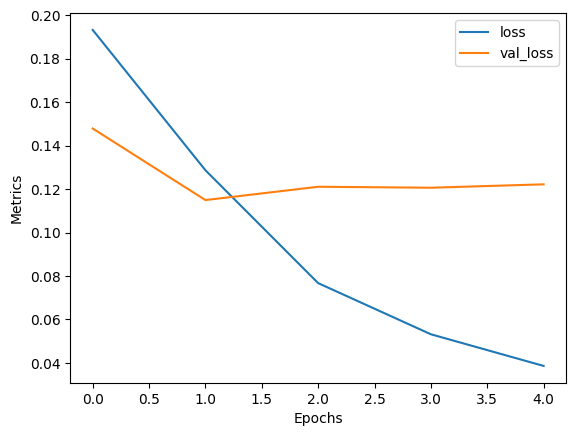

In [ ]:
# STAMPA DEL GRAFICO DELLE METRICHE DI ADDESTRAMENTO
plot_history(history, metrics=['loss', 'val_loss'])

# ESTRAZIONE MAPPE DELLE CLASSI DI ATTIVAZIONE

In [ ]:
# CARICAMENTO DEI PESI DELLA RETE ADDESTRATA CON TRIPLET LOSS
siameseRES_model.load_weights(ResWeights_path + "Weights_lr1e-05_batch150_epochs20_bestEpoch1.hdf5")

In [ ]:
# INIZIALIZZAZIONE DELLE VARIABILI
index = 1000                                                                    # Indice della tripletta di esempio di cui si vogliono estrarre le mappe di attivazione

# LETTURA DEI CSV PER ANCHOR-POSITIVE-NEGATIVE
anchor_list = list_from_csv(local_anchorTR_path) 
positive_list = list_from_csv(local_positiveTR_path) 
negative_list = list_from_csv(local_negativeTR_path)

# ESTRAZIONE DELLE TRE IMMAGINI
anchor_image = img_preprocessing(anchor_list[index][0], input_dimension)
positive_image = img_preprocessing(positive_list[index][0], input_dimension)
negative_image = img_preprocessing(negative_list[index][0], input_dimension)

# ESTRAZIONE DI UNO DEI TRE RAMI DELLA RETE
model = siameseRES_model.get_layer('vggface_resnet50')

# DEFINIZIONE DEL LAYER CONVOLUZIONALE DA CUI ESTRARRE LE MAPPE DI ATTIVAZIONE
layer_names = ["conv5_3_1x1_increase"]

# CREAZIONE DEI MODELLI DI ATTIVAZIONE
activation_models = []                                                          # Lista per archiviare i modelli di attivazione per ogni livello
for layer_name in layer_names:
    activation_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    activation_models.append(activation_model)

1/1 [==============================] - 1s 720ms/step


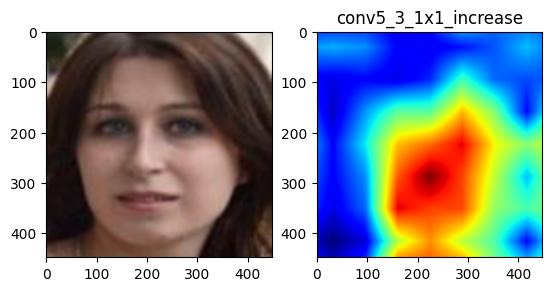

In [ ]:
''' STAMPA DELLA MAPPA DI ATTIVAZIONE DELL'ANCHOR IMAGE '''

# ESTRAZIONE DELLE CLASSI DI ATTIVAZIONE PER OGNI LIVELLO
activations = []                                                                # Lista per archiviare le attivazioni estratte da ogni livello
for activation_model in activation_models:
    activations.append(activation_model.predict(np.expand_dims(anchor_image, axis=0)))

# VISUALIZZAZIONE DELL'IMMAGINE ORIGINALE
plt.subplot(1, len(activations)+1, 1)
anchor_image = resize(anchor_image, (2*input_dimension, 2*input_dimension), order=1)
plt.imshow(anchor_image)

# VISUALIZZAZIONE DELL'EVOLVERSI DELLE MAPPE DI ATTIVAZIONE PER OGNI LIVELLO
for i, activation_map in enumerate(activations):
    plt.subplot(1, len(activations)+1, i+2)
    map = np.max(np.array(activation_map).squeeze(), axis = 2)                  # Prendiamo il valore massimo tra i diversi canali
    map = resize(map, (2*input_dimension, 2*input_dimension), order=1)
    plt.imshow(map, cmap='jet')
    plt.title(layer_names[i])
plt.show()

1/1 [==============================] - 0s 28ms/step


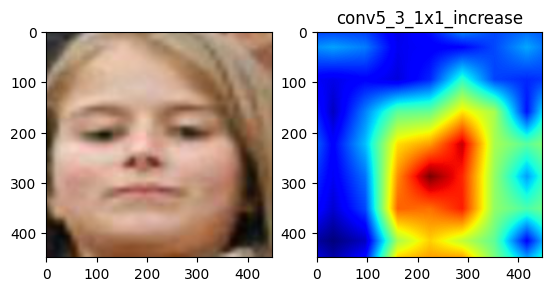

In [ ]:
''' STAMPA DELLA MAPPA DI ATTIVAZIONE DELLA POSITIVE IMAGE '''

# ESTRAZIONE DELLE CLASSI DI ATTIVAZIONE PER OGNI LIVELLO
activations = []                                                                # Lista per archiviare le attivazioni estratte da ogni livello
for activation_model in activation_models:
    activations.append(activation_model.predict(np.expand_dims(positive_image, axis=0)))

# VISUALIZZAZIONE DELL'IMMAGINE ORIGINALE
plt.subplot(1, len(activations)+1, 1)
positive_image = resize(positive_image, (2*input_dimension, 2*input_dimension), order=1)
plt.imshow(positive_image)

# VISUALIZZAZIONE DELL'EVOLVERSI DELLE MAPPE DI ATTIVAZIONE PER OGNI LIVELLO
for i, activation_map in enumerate(activations):
    plt.subplot(1, len(activations)+1, i+2)
    map = np.max(np.array(activation_map).squeeze(), axis = 2)                  # Prendiamo il valore massimo tra i diversi canali
    map = resize(map, (2*input_dimension, 2*input_dimension), order=1)
    plt.imshow(map, cmap='jet')
    plt.title(layer_names[i])
plt.show()

1/1 [==============================] - 0s 24ms/step


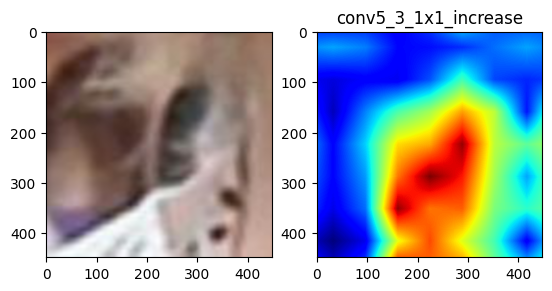

In [ ]:
''' STAMPA DELLA MAPPA DI ATTIVAZIONE DELLA NEGATIVE IMAGE '''

# ESTRAZIONE DELLE CLASSI DI ATTIVAZIONE PER OGNI LIVELLO
activations = []                                                                # Lista per archiviare le attivazioni estratte da ogni livello
for activation_model in activation_models:
    activations.append(activation_model.predict(np.expand_dims(negative_image, axis=0)))

# VISUALIZZAZIONE DELL'IMMAGINE ORIGINALE
plt.subplot(1, len(activations)+1, 1)
negative_image = resize(negative_image, (2*input_dimension, 2*input_dimension), order=1)
plt.imshow(negative_image)

# VISUALIZZAZIONE DELL'EVOLVERSI DELLE MAPPE DI ATTIVAZIONE PER OGNI LIVELLO
for i, activation_map in enumerate(activations):
    plt.subplot(1, len(activations)+1, i+2)
    map = np.max(np.array(activation_map).squeeze(), axis = 2)                  # Prendiamo il valore massimo tra i diversi canali
    map = resize(map, (2*input_dimension, 2*input_dimension), order=1)
    plt.imshow(map, cmap='jet')
    plt.title(layer_names[i])
plt.show()

# CREAZIONE DEI CSV DELLE IMMAGINI E RELAZIONI 

In [ ]:
def label_constructor(splitted_path, flag):
  ''' 
      Salva due liste di path per le coppie di immagini e una lista di labels che useremo 
      per la feature extraction e la classificazione
        # PRECONDIZIONE: file npy contenenti i path delle immagini e relazioni tra i vari familiari
        # POSTCONDIZIONE: restituisce due liste contenenti path di immagini e una lista contenente labels

      ----------
      PARAMETRI:
        splitted_path: path per la cartella di Training/Validation/Test
            str
        flag: flag per individuare se si tratta di training (0), validation (1) o test (2)
            int

      ----------
      RETURN:
        img1_listpath: lista di path della prima immagine di ogni coppia
            list
        img2_listpath: lista di path della seconda immagine di ogni coppia
            list
        label_list: lista delle label contenenti le relazioni
            list

  '''
  img1_listpath = list()                                                        # Inizializzazione lista per i path della prima immagine
  img2_listpath = list()                                                        # Inizializzazione lista per i path della seconda immagine
  label_list = list()                                                           # Inizializzazione lista per le label di relazione di parentela
  offset = 0

  if(flag == 0):
    offset = 71                                                                 # Offset per il path di training
  elif(flag == 1):                                                                            
    offset = 73                                                                 # Offset per il path di validation
  elif(flag == 2):
    offset = 67                                                                 # Offset per il path di test
  else:
    print("FLAG ERRATO")
    return img1_listpath, img2_listpath, label_list

  with tqdm(total = len(glob(splitted_path + '/F*')), ncols = 80) as pbar:      # Setta la barra di avanzamento
    for fname in sorted(glob(splitted_path + '/F*')):                           # Scorriamo gli npy contenenti i path delle immagini e relazioni tra i vari familiari

      pbar.update(1)                                                            # Aggiornamento della barra di avanzamento
      np_training = array_from_file(fname)                                      # Caricamento di un array con i contenuti del .npy tra MID di una famiglia
        
      for i in range(len(np_training)):
        img1_listpath.append(str(np_training[i][0]))                            # Aggiungiamo la prima immagine presente negli npy
        img2_listpath.append(str(np_training[i][1]))                            # Aggiungiamo la seconda immagine presente negli npy
        label_list.append(str(np_training[i][2]))                               # Aggiundiamo la label tra le persone presenti nelle due immaigni

    pbar.set_postfix_str("Creazione Label.csv Completata")                      # Notifica di completamento

  return img1_listpath, img2_listpath, label_list

In [ ]:
img1_listpathTR = list()
img2_listpathTR = list()
label_listTR = list()
flagTR = 0                                                                      # Flag che indica il training

img1_listpathTR, img2_listpathTR, label_listTR = label_constructor(training_path, flagTR)

list_on_csv(training_path, img1_listpathTR, 'img1')                             # Creazione del csv per la prima immagine di ogni coppia
list_on_csv(training_path, img2_listpathTR, 'img2')                             # Creazione del csv per la seconda immagine di ogni coppia
list_on_csv(training_path, label_listTR, 'label')                               # Creazione del csv con le relazioni


img1_listpathV = list()
img2_listpathV = list()
label_listV = list()
flagV = 1                                                                       # Flag che indica la validation

img1_listpathV, img2_listpathV, label_listV = label_constructor(validation_path, flagV)

list_on_csv(validation_path, img1_listpathV, 'img1')                            # Creazione del csv per la prima immagine di ogni coppia
list_on_csv(validation_path, img2_listpathV, 'img2')                            # Creazione del csv per la seconda immagine di ogni coppia
list_on_csv(validation_path, label_listV, 'label')                              # Creazione del csv con le relazioni


img1_listpathT = list()
img2_listpathT = list()
label_listT = list()
flagT = 2                                                                       # Flag che indica il test

img1_listpathT, img2_listpathT, label_listT = label_constructor(test_path, flagT)

list_on_csv(test_path, img1_listpathT, 'img1')                                  # Creazione del csv per la prima immagine di ogni coppia
list_on_csv(test_path, img2_listpathT, 'img2')                                  # Creazione del csv per la seconda immagine di ogni coppia
list_on_csv(test_path, label_listT, 'label')                                    # Creazione del csv con le relazioni

100%|███████| 2385/2385 [00:37<00:00, 63.15it/s, Creazione Label.csv Completata]


# DEFINIZIONE RETE PER ESTRAZIONE DI FEATURE

In [ ]:
def create_siamese_network(base_network, input_dimension, input_channels, weights_path, filename):
  ''' 
      Crea un modello di rete siamese per l'estrazione di features
        # PRECONDIZIONE: definizione dell'architettura di rete e path dei pesi pre-addestrati valido
        # POSTCONDIZIONE: modello di rete siamese per feature extraction

      ----------
      PARAMETRI:
        base_model: modello base di rete
            keras_vggface
        input_dimension: dimensione di input dell'immagine
            int
        input_channels: numero di canali di input dell'immagine
            int
        anchor_path: percorso dei pesi della rete pre-addestrata con triplet loss
            str
        filename: nome dei pesi specifici da prendere
            str

      ----------
      RETURN:
        Model
  ''' 
  base_network.load_weights(weights_path + filename)                            # Caricamento dei pesi sul base_network

  base_network = base_network.get_layer("vggface_resnet50")                     # Estrazione dei layer corrispondenti a ResNet50                 
  
  # DEFINIZIONE DEGLI INPUT
  input_1 = Input(shape = (input_dimension, input_dimension, input_channels))
  input_2 = Input(shape = (input_dimension, input_dimension, input_channels))
  
  # SELEZIONE DEI LAYER DI INTERESSE
  desired_layers = ["activation_9", "activation_21", "activation_39", "activation_48"]
  selected_features = []

  # ESTRAZIONE DELLE FEATURE DAI LAYER DI INTERESSE
  for layer_name in desired_layers:
    layer_output = base_network.get_layer(layer_name).output                    # Estrazione delle feature dallo strato corrente

    pooled_features = tf.keras.layers.GlobalAveragePooling2D()(layer_output)    # Averaging Pooling 1x1

    normalized_features = tf.keras.layers.BatchNormalization()(pooled_features) # Aggiunta di un layer di BatchNormalization

    selected_features.append(normalized_features)                               # Salvataggio delle feature estratte per lo strato corrente

  concatenated = tf.keras.layers.Concatenate()(selected_features)               # Concatenazione delle feature per tutti gli strati
  
  # CREAZIONE DI UN NUOVO MODELLO CON INPUT E FEATURE ESTRATTE
  new_model = Model(inputs = base_network.input, outputs = concatenated)          

  # APPLICAZIONE DELLE DUE IMMAGINI IN INGRESSO AL NUOVO MODELLO
  total_features_1 = new_model(input_1)
  total_features_2 = new_model(input_2)

  # CALCOLO DELLA DIFFERENZA IN VALORE ASSOLUTO TRA LE FEATURE DELLE DUE IMMAGINI (L1)
  diff_features = tf.math.abs(tf.subtract(total_features_1, total_features_2))

  # CREAZIONE DEL MODELLO DI RETE SIAMESE CON INPUT LE DUE IMMAGINI E OUTPUT LA L1 DELLE FEATURES
  siamese_model = Model(inputs=[input_1,input_2], outputs=diff_features)    

  return siamese_model

In [ ]:
filename = "Weights_lr1e-05_batch150_epochs20_bestEpoch1.hdf5"                  # Nome dei pesi scelti

# DEFINIZIONE RETE SIAMESE PER FEATURE EXTRACTION
siamese_model = create_siamese_network(siameseRES_model, input_dimension, input_channels, ResWeights_path, filename)
siamese_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 3840)         23576512    ['input_5[0][0]',                
                                                                  'input_6[0][0]']          

# ESTRAZIONE DEI PATH E DELLE LABEL DAI CSV

In [ ]:
# SALVATAGGIO DEI CSV PER IMG1-IMG2-LABEL DEL TRAINING IN LOCALE
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training/img1.csv" "img1TR.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training/img2.csv" "img2TR.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training/label.csv" "labelTR.csv"

# SALVATAGGIO DEI CSV PER IMG1-IMG2-LABEL DEL VALIDATION IN LOCALE
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation/img1.csv" "img1V.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation/img2.csv" "img2V.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation/label.csv" "labelV.csv"

# SALVATAGGIO DEI CSV PER IMG1-IMG2-LABEL DEL TEST IN LOCALE
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Test/img1.csv" "img1T.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Test/img2.csv" "img2T.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Test/label.csv" "labelT.csv"

In [ ]:
# CARICA PATH DELLE IMMAGINI E LABEL DI TRAINING DAI CSV
img1TR_paths= list_from_csv(local_img1TR_path)
img2TR_paths = list_from_csv(local_img2TR_path)
train_labels = list_from_csv(local_labelTR_path)

# CARICA PATH DELLE IMMAGINI E LABEL DI VALIDATION DAI CSV
img1V_paths= list_from_csv(local_img1V_path)
img2V_paths = list_from_csv(local_img2V_path)
val_labels = list_from_csv(local_labelV_path)

# CARICA PATH DELLE IMMAGINI E LABEL DI TEST DAI CSV
img1T_paths= list_from_csv(local_img1T_path)
img2T_paths = list_from_csv(local_img2T_path)
test_labels = list_from_csv(local_labelT_path)

In [ ]:
all_labels = train_labels + val_labels + test_labels                            # Uniamo le liste di labels in un'unica lista

# CREAZIONE DELL'ENCODER DI LABELS
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)    

# CODIDICA DELLE LABEL IN FORMATO NUMERICO DAL FORMATO STRINGA
train_encode_labels = label_encoder.transform(np.ravel(train_labels))       
val_encode_labels = label_encoder.transform(np.ravel(val_labels))
test_encode_labels = label_encoder.transform(np.ravel(test_labels))
# N.B. np.ravel() appiattisce la lista di liste di label

# CREAZIONE NOTAZIONE ONE-HOT
train_labels = to_categorical(train_encode_labels, num_classes) 
val_labels = to_categorical(val_encode_labels, num_classes)
test_labels = to_categorical(test_encode_labels, num_classes)

# LIBERAZIONE MEMORIA RAM
del train_encode_labels, val_encode_labels, test_encode_labels
gc.collect()

# FEATURE EXTRACTION

In [ ]:
def features_extraction(image_paths_1, image_paths_2, labels, siamese_model, input_dimension, input_channel, coppie_tot):
  ''' 
      Estrae le features a partire dalle immagini specificate dai path
        # PRECONDIZIONE: paths delle coppie di immagini da cui estrarre le features
        # POSTCONDIZIONE: lista di features estratte e di labels
      ----------
      PARAMETRI:
        image_paths_1: lista di paths della prima immagine
            list
        image_paths_2: lista di paths della seconda immagine
            list
        labels: lista di labels
            list
        siamese_model: modello siamese di rete per la feature extraction
            keras_vggface
        input_dimension: dimensione desiderata dell'immagine
            int
        input_channel: numero di canali dell'immagine
            int
        coppie_tot: numero di coppie per relazione da considerare
            int
      ----------
      RETURN:
        all_features: lista delle features estratte
            list
        all_labels: lista delle labels relative alle coppie considerate
            list
  '''   
  logger.info("Inizio Features Extraction")
  
  all_features = []                                                             # Inizializzazione della lista contenenti tutti i vettori di feature estratti
  all_labels = []                                                               # Inizializzazione della lista conteneti tutte le labels
  with tqdm(total=coppie_tot, ncols=80) as pbar:                                # Setta la barra di avanzamento
      for i in range(coppie_tot):     
          pbar.update(1)                                                        # Avanzamento della barra
          image_1 = img_preprocessing(image_paths_1[i][0], input_dimension)     # Pre-processing della prima immagine della coppia
          image_1 = np.reshape(image_1, (-1, input_dimension, input_dimension, input_channel))
          image_2 = img_preprocessing(image_paths_2[i][0], input_dimension)     # Pre-processing della seconda immagine della coppia
          image_2 = np.reshape(image_2, (-1, input_dimension, input_dimension, input_channel))
          predicted_features = siamese_model.predict([image_1, image_2], verbose=0) # Utilizzo il modello di rete siamese per estrarre il vettore di feature
          all_features.append(predicted_features[0])                      # Aggiungo il vettore di feature estratto (batch_features deve essere una matrice)
          all_labels.append(labels[i])                         
  pbar.set_postfix_str("Creazione Label.csv Completata")
  return all_features, all_labels

In [ ]:
# COPPIE PER IL TRAINING-VALIDATION-TEST (70%-15%-15%)
coppie_totTR = 50000                                                            
coppie_totV = 10715
coppie_totT = 10715

In [ ]:
# CHIAMATA PER FEATURE EXTRACTION CON PCA DEL TRAINING
training_features, reduced_train_labels = features_extraction(img1TR_paths, img2TR_paths, train_labels, siamese_model, input_dimension, input_channels, coppie_totTR)

# SALVATAGGIO DELLE FEATURES E DELLE LABELS ESTRATTE SU NPY BINARI PER IL TRAINING
array_on_file(features_labels_pathTR + str(coppie_totTR) + 'R_training_feature', np.array(training_features))
array_on_file(features_labels_pathTR + str(coppie_totTR) + 'R_reduced_train_labels', np.array(reduced_train_labels))

# LIBERAZIONE MEMORIA RAM
del training_features, reduced_train_labels, img1TR_paths, img2TR_paths, train_labels
gc.collect()

In [ ]:
# CHIAMATA PER FEATURE EXTRACTION CON PCA DEL VALIDATION
validation_features, reduced_val_labels = features_extraction(img1V_paths, img2V_paths, val_labels, siamese_model, input_dimension, input_channels, coppie_totV)

# SALVATAGGIO DELLE FEATURES E DELLE LABELS ESTRATTE SU NPY BINARI PER LA VALIDATION
array_on_file(features_labels_pathV + str(coppie_totV) + 'R_validation_feature', np.array(validation_features))
array_on_file(features_labels_pathV + str(coppie_totV) + 'R_reduced_val_labels', np.array(reduced_val_labels))

# LIBERAZIONE MEMORIA RAM
del validation_features, reduced_val_labels, img1V_paths, img2V_paths, val_labels
gc.collect()

100%|█████████████████████████████████████| 10715/10715 [50:25<00:00,  3.54it/s]


177951

In [ ]:
# CHIAMATA PER FEATURE EXTRACTION CON PCA DEL TEST
test_features, reduced_test_labels = features_extraction(img1T_paths, img2T_paths, test_labels, siamese_model, input_dimension, input_channels, coppie_totT)

# SALVATAGGIO DELLE FEATURES E DELLE LABELS ESTRATTE SU NPY BINARI PER IL TEST
array_on_file(features_labels_pathT + str(coppie_totT) + 'R_test_feature', np.array(test_features))
array_on_file(features_labels_pathT + str(coppie_totT) + 'R_reduced_test_labels', np.array(reduced_test_labels))

# LIBERAZIONE MEMORIA RAM
del test_features, reduced_test_labels, img1T_paths, img2T_paths, test_labels
gc.collect()

100%|█████████████████████████████████████| 10715/10715 [49:01<00:00,  3.64it/s]


190223

# DEFINIZIONE RETE CLASSIFICATORE

In [ ]:
def create_classifier(num_classes, siamese_model, feature_dimension, flagClassifier, learning_rate):     
  ''' 
      Crea un modello di classificatore
        # PRECONDIZIONE: definizione dell'architettura del modello siamese di estrazione delle feature e numero di classi per le label
        # POSTCONDIZIONE: modello di classificatore
      ----------
      PARAMETRI:
        num_classes: numero di classi per le label di relazione parentale
            int
        siamese_model: modello siamese di rete per la feature extraction
            keras_vggface
        feature_dimension
        flagClassifier: flag per indicare se classificatore binario (0) o classificatore a classi multiple (1)
            int
        learning_rate: valore del learning rate
            float
      ----------
      RETURN:
        Sequential
  '''                                                            
  # CREAZIONE DEL MODELLO DEL CLASSIFICATORE
  classifier_model = Sequential([                                             
  # LAYER FC CON 512 NEURONI E ACTIVATION FUNCTION 'relu'
  Dense(512, activation='relu', input_shape=(feature_dimension,)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  ])

  # LAYER DI OUTPUT CON NUMERO DI CLASSI DERIDERATO E ACTIVATION FUNCTION
  if flagClassifier == 1:
    classifier_model.add(Dense(num_classes, activation='softmax'))
  elif flagClassifier == 0:
    classifier_model.add(Dense(num_classes, activation='sigmoid'))
  else:
    print("ERRORE FLAG ERRATO")
    return 0

  classifier_model.summary()                                                    # Stampa del modello

  # COMPILAZIONE DEL MODELLO
  if (flagClassifier == 1):
    classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=[keras.metrics.CategoricalAccuracy()])
  elif (flagClassifier == 0):
    classifier_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = learning_rate),
                            loss=keras.losses.binary_crossentropy,
                            metrics=['accuracy'])
  else:
    print("ERRORE FLAG ERRATO")
    return 0

  return classifier_model

In [ ]:
flagClassifierNA = 0
num_classesNA = 1
learning_rate = 1e-4

# CLASSIFICATORE PER RELAZIONE BINARIA SENZA IPCA
relation_classifier_model = create_classifier(num_classesNA, siamese_model, feature_dimension, flagClassifierNA, learning_rate)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1966592   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,139,137
Trainable params: 2,139,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
flagClassifierR = 1
num_classesR = 3
learning_rate = 1e-4

# CLASSIFICATORE PER GRADO DI RELAZIONE
classifier_model = create_classifier(num_classesR, siamese_model, feature_dimension, flagClassifierR, learning_rate)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               1966592   
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,139,267
Trainable params: 2,139,267
Non-trainable params: 0
_________________________________________________________________


# PREPARAZIONE DELLE LABELS E FEATURES PER IL FIT [TODO: commentare e definizioni da spostare nel FUNZIONI PER IL PREPROCESSING DEGLI INPUT?]

In [ ]:
# ESTRAZIONE DELLE FEATURES E DELLE LABELS ESTRATTE DA NPY BINARI
training_features = array_from_file(features_labels_pathTR + str(coppie_totTR) + 'R_training_feature')
validation_features = array_from_file(features_labels_pathV + str(coppie_totV) + 'R_validation_feature')
test_features = array_from_file(features_labels_pathT + str(coppie_totT) + 'R_test_feature')
reduced_train_labels = array_from_file(features_labels_pathTR + str(coppie_totTR) + 'R_reduced_train_labels')
reduced_val_labels = array_from_file(features_labels_pathV + str(coppie_totV) + 'R_reduced_val_labels')
reduced_test_labels = array_from_file(features_labels_pathT + str(coppie_totT) + 'R_reduced_test_labels')

In [ ]:
print("LA DIMENSIONE DEI VETTORI DI FEATURE È: ")
print(training_features.shape)
print(validation_features.shape)
print(test_features.shape)

print("LA DIMENSIONE DEI DELLE LABELS È: ")
print(reduced_train_labels.shape)
print(reduced_val_labels.shape)
print(reduced_test_labels.shape)

LA DIMENSIONE DEI VETTORI DI FEATURE È: 
(50000, 3840)
(10715, 3840)
(10715, 3840)
LA DIMENSIONE DEI DELLE LABELS È: 
(50000, 12)
(10715, 12)
(10715, 12)


In [ ]:
reduced_train_labels = np.argmax(reduced_train_labels, axis = 1)
reduced_val_labels = np.argmax(reduced_val_labels, axis = 1)
reduced_test_labels = np.argmax(reduced_test_labels, axis = 1)

In [ ]:
def relation_binary(splitted_features, splitted_labels):
  na = np.array(9)

  counterNA = 0
  counterR = 0

  new_splitted_labels = []
  new_splitted_features = []
  
  for i in range(len(splitted_labels)):
    if (np.array_equal(na, splitted_labels[i])):
      new_splitted_labels.append(1)
      new_splitted_features.append(splitted_features[i])
      counterNA = counterNA + 1
    else:
      new_splitted_labels.append(0)
      new_splitted_features.append(splitted_features[i])
      counterR = counterR + 1

  splitted_labels = np.array(new_splitted_labels)
  splitted_features = np.array(new_splitted_features)

  print("SONO PRESENTI:")
  print("\t" + str(counterNA) + " NON RELAZIONI")
  print("\t" + str(counterR) + " RELAZIONI")

  return splitted_features, splitted_labels

In [ ]:
print("TRAINING")
btraining_features, btrain_labels = relation_binary(training_features, reduced_train_labels)

print("\nVALIDATION")
bvalidation_features, bval_labels = relation_binary(validation_features, reduced_val_labels)

print("\nTEST")
btest_features, btest_labels = relation_binary(test_features, reduced_test_labels)

TRAINING
SONO PRESENTI:
	12272 NON RELAZIONI
	37728 RELAZIONI

VALIDATION
SONO PRESENTI:
	2258 NON RELAZIONI
	8457 RELAZIONI

TEST
SONO PRESENTI:
	3197 NON RELAZIONI
	7518 RELAZIONI


In [ ]:
def relation_unity(splitted_features, splitted_labels):
  new_splitted_features = []
  new_splitted_labels = []

  bb = np.array(0)
  fd = np.array(1)
  fs = np.array(2)
  gfgd = np.array(3)
  gfgs = np.array(4)
  gmgd = np.array(5)
  gmgs = np.array(6)
  md = np.array(7)
  ms = np.array(8)
  ss = np.array(9)
  sibs = np.array(10)

  for i in range(len(splitted_features)):
    new_splitted_features.append(splitted_features[i])
    if (np.array_equal(bb, splitted_labels[i]) or
        np.array_equal(ss, splitted_labels[i]) or
        np.array_equal(sibs, splitted_labels[i])):
        new_splitted_labels.append(0)
    elif (np.array_equal(fs, splitted_labels[i]) or
        np.array_equal(fd, splitted_labels[i]) or
        np.array_equal(ms, splitted_labels[i]) or
        np.array_equal(md, splitted_labels[i])):
        new_splitted_labels.append(1) 
    else:
        new_splitted_labels.append(2) 
  splitted_features = np.array(new_splitted_features)
  splitted_labels = np.array(new_splitted_labels)

  return splitted_features, splitted_labels

In [ ]:
training_features, reduced_train_labels = relation_unity(training_features, reduced_train_labels)
validation_features, reduced_val_labels = relation_unity(validation_features, reduced_val_labels)
test_features, reduced_test_labels = relation_unity(test_features, reduced_test_labels)

In [ ]:
def relation_balance3C(splitted_features, splitted_labels, threshold):
  sibs = np.array(0)
  pc = np.array(1)
  gpgc = np.array(2)

  counterSIBS = 0
  counterPC = 0
  counterGPGC = 0

  new_splitted_labels = []
  new_splitted_features = []

  flag = 0

  for i in range(len(splitted_labels)):
    if (np.array_equal(sibs, splitted_labels[i])):
      counterSIBS = counterSIBS + 1
    elif (np.array_equal(pc, splitted_labels[i])):
      counterPC = counterPC + 1
    elif (np.array_equal(gpgc, splitted_labels[i])):
      counterGPGC = counterGPGC + 1
    else:
      print("ERRORE LABELS ERRATE")
      return 0

  print("SONO PRESENTI:")
  print("\t" + str(counterSIBS) + " RELAZIONI DI SIBLINGS")
  print("\t" + str(counterPC) + " RELAZIONI DI PARENT-CHILD")
  print("\t" + str(counterGPGC) + " RELAZIONI DI GRANDPARENT-CHILD")

  min_value = float('inf') 

  if counterSIBS > threshold:
    min_value = min(min_value, counterSIBS)
  if counterPC > threshold:
    min_value = min(min_value, counterPC)
  if counterGPGC > threshold:
    min_value = min(min_value, counterGPGC)

  counterSIBS = 0
  counterPC = 0
  counterGPGC = 0
  
  for i in range(len(splitted_labels)):
    if (np.array_equal(sibs, splitted_labels[i])):
      if (counterSIBS < min_value):
        new_splitted_labels.append(splitted_labels[i])
        new_splitted_features.append(splitted_features[i])
        counterSIBS = counterSIBS + 1
    elif (np.array_equal(pc, splitted_labels[i])):
      if (counterPC < min_value):
        new_splitted_labels.append(splitted_labels[i])
        new_splitted_features.append(splitted_features[i])
        counterPC = counterPC + 1
    elif (np.array_equal(gpgc, splitted_labels[i])):
      if (counterGPGC < min_value):
        new_splitted_labels.append(splitted_labels[i])
        new_splitted_features.append(splitted_features[i])
        counterGPGC = counterGPGC + 1
    else:
      print("ERRORE LABELS ERRATE")
      return 0

  splitted_labels = np.array(new_splitted_labels)
  splitted_features = np.array(new_splitted_features)

  print("DOPO AVER EQUILIBRATO SONO PRESENTI:")
  print("\t" + str(counterSIBS) + " RELAZIONI DI SIBLINGS")
  print("\t" + str(counterPC) + " RELAZIONI DI PARENT-CHILD")
  print("\t" + str(counterGPGC) + " RELAZIONI DI GRANDPARENT-CHILD")

  return splitted_features, splitted_labels

In [ ]:
thresholdTR = len(reduced_train_labels) * 0.15
print("TRAINING")
training_features, reduced_train_labels = relation_balance3C(training_features, reduced_train_labels, thresholdTR)

thresholdV = len(reduced_val_labels) * 0.15
print("\nVALIDATION")
validation_features, reduced_val_labels = relation_balance3C(validation_features, reduced_val_labels, thresholdV)

thresholdT = len(reduced_test_labels) * 0.15
print("\nTEST")
test_features, reduced_test_labels = relation_balance3C(test_features, reduced_test_labels, thresholdT)

TRAINING
SONO PRESENTI:
	23903 RELAZIONI DI SIBLINGS
	23330 RELAZIONI DI PARENT-CHILD
	2767 RELAZIONI DI GRANDPARENT-CHILD
DOPO AVER EQUILIBRATO SONO PRESENTI:
	23330 RELAZIONI DI SIBLINGS
	23330 RELAZIONI DI PARENT-CHILD
	2767 RELAZIONI DI GRANDPARENT-CHILD

VALIDATION
SONO PRESENTI:
	4413 RELAZIONI DI SIBLINGS
	4962 RELAZIONI DI PARENT-CHILD
	1340 RELAZIONI DI GRANDPARENT-CHILD
DOPO AVER EQUILIBRATO SONO PRESENTI:
	4413 RELAZIONI DI SIBLINGS
	4413 RELAZIONI DI PARENT-CHILD
	1340 RELAZIONI DI GRANDPARENT-CHILD

TEST
SONO PRESENTI:
	4049 RELAZIONI DI SIBLINGS
	5759 RELAZIONI DI PARENT-CHILD
	907 RELAZIONI DI GRANDPARENT-CHILD
DOPO AVER EQUILIBRATO SONO PRESENTI:
	4049 RELAZIONI DI SIBLINGS
	4049 RELAZIONI DI PARENT-CHILD
	907 RELAZIONI DI GRANDPARENT-CHILD


In [ ]:
num_classes = 3

# CREAZIONE NOTAZIONE ONE-HOT
train_labels = to_categorical(reduced_train_labels, num_classes) 
val_labels = to_categorical(reduced_val_labels, num_classes)
test_labels = to_categorical(reduced_test_labels, num_classes)

print("LA DIMENSIONE DEI VETTORI DI FEATURE È: ")
print(training_features.shape)
print(validation_features.shape)
print(test_features.shape)

print("LA DIMENSIONE DEI DELLE LABELS È: ")
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

LA DIMENSIONE DEI VETTORI DI FEATURE È: 
(49427, 3840)
(10166, 3840)
(9005, 3840)
LA DIMENSIONE DEI DELLE LABELS È: 
(49427, 3)
(10166, 3)
(9005, 3)


# TRAINING E HISTORY CLASSIFICATORE RELAZIONE BINARIA

In [ ]:
# ISTANZA DEL CLASSIFICATORE SMOTE
smote = SMOTE()

# OVERSAMPLING DEI SET DI TRAINING-VALIDATION-TEST (Dataset sbilanciato)
btraining_featuresOS, btrain_labelsOS = smote.fit_resample(btraining_features, btrain_labels)
bvalidation_featuresOS, bval_labelsOS = smote.fit_resample(bvalidation_features, bval_labels)
btest_featuresOS, btest_labelsOS = smote.fit_resample(btest_features, btest_labels)

In [ ]:
# INIZIALIZZAZIONE VARIABILI
num_epochs = 150                                                                # Numero di epoche per il fit
batch_size = 100                                                                # Grandezza di ogni batch per il fit
patience_LR = 3                                                                 # Valore di patience per la callback di riduzione del learning rate
patience_ES = 30                                                                # Valore di patience per la callback di stop preoce dell'addestramento
flagClassifierNA = 0                                                            # Flag per indicare il classificatore Relazione/Non-Relazione
num_classesNA = 1                                                               # Numero di classi per il classificatore (0= Relazione, 1= Non relazione)
learning_rate = 0.00015                                                         # Learning rate del classificatore

# CALLBACK: Riduce il learning rate quando una particolare metrica smette di migliorare
reduce_lr = keras.callbacks.ReduceLROnPlateau(                                  
    monitor = 'val_accuracy',                                                   # Monitora l'accuracy del validation set
    factor = 0.1,                                                               # Fattore di riduzione del learning rate (10%)
    patience = patience_LR,                                                     # Numero di epoche senza miglioramenti dopo il quale il learning rate viene ridotto
    verbose = 1,                                                                # Stampa un messaggio quando il learning rate viene ridotto
    mode = 'max',                                                               # Modalità di monitoraggio ('max' per massimizzare l'accuracy)
    min_delta = 0.0001,                                                         # Soglia per considerare un miglioramento significativo
    min_lr = 1e-9                                                               # Learning rate minimo consentito
)

# CALLBACK: Se una particolare metrica smette di migliorare l'addestramento viene interrotto
early_stopping = keras.callbacks.EarlyStopping(                                 
    monitor = "val_accuracy",                                                   # Monitora l'accuracy del validation set
    min_delta = 0,                                                              # Differenza minima ritenuta come miglioramento
    patience = patience_ES,                                                     # Numero di epoche consecutive senza miglioramento prima di interrompere l'addestramento
    verbose = 1,                                                                # Stampa un messaggio quando l'addestramento viene interrotto
    mode = "max",                                                               # Indica che la metrica monitorata deve essere massimizzata
    baseline = None,                                                            # Valore di riferimento per la metrica monitorata
    restore_best_weights = True,                                                # Ripristina i pesi del modello al miglior punto durante l'addestramento
    start_from_epoch = 0,                                                       # Indica da quale epoca iniziare il conteggio delle epoche senza miglioramento
)

# CALLBACK: Salvataggio delle metriche di training e validazione in formato csv
csv_logger = keras.callbacks.CSVLogger(local_CSVLoggerClassifier_path)

# CLASSIFICATORE PER RELAZIONE BINARIA
relation_classifier_model = create_classifier(num_classesNA, siamese_model, feature_dimension, flagClassifierNA, learning_rate)

# ADDESTRAMENTO CLASSIFICATORE BINARIO
history_classifier = relation_classifier_model.fit(x = btraining_featuresOS,
                                          y = btrain_labelsOS,
                                          batch_size = batch_size,
                                          epochs = num_epochs,
                                          validation_data = (bvalidation_featuresOS, bval_labelsOS),
                                          verbose = True,
                                          callbacks=[csv_logger, early_stopping])

In [ ]:
# CREAZIONE INSOGRAMMA DELLA HISTORY
plot_history(history_classifier, ['val_accuracy'])

In [ ]:
flagModelBC = 0

# CREAZIONE MATRICE DI CONFUSIONE PER IL TEST SET
confusionMatrix(relation_classifier_model, btest_featuresOS, btest_labelsOS, flagModelBC)

# TRAINING E HISTORY CLASSIFICATORE GRADI DI PARENTELA

In [ ]:
# INIZIALIZZAZIONE VARIABILI
num_epochs = 200                                                                # Numero di epoche per il fit
batch_size = 350                                                                # Grandezza di ogni batch per il fit
patience_LR = 10                                                                 # Valore di patience per la callback di riduzione del learning rate
patience_ES = 30                                                                # Valore di patience per la callback di stop preoce dell'addestramento
flagClassifierR = 1                                                             # Flag per indicare il classificatore
num_classesR = 3                                                                # Numero di classi (0= Siblings, 1= Parent-Child, 2= GrandParent-GrandChildren)              
learning_rate = 3e-5                                                            # Learning rate del classificatore


# CALLBACK: Riduce il learning rate quando una particolare metrica smette di migliorare
reduce_lr = keras.callbacks.ReduceLROnPlateau(                                  
    monitor = 'val_categorical_accuracy',                                       # Monitora l'accuracy del validation set
    factor = 0.1,                                                               # Fattore di riduzione del learning rate (10%)
    patience = patience_LR,                                                     # Numero di epoche senza miglioramenti dopo il quale il learning rate viene ridotto
    verbose = 1,                                                                # Stampa un messaggio quando il learning rate viene ridotto
    mode = 'max',                                                               # Modalità di monitoraggio ('max' per massimizzare l'accuracy)
    min_delta = 0.0001,                                                         # Soglia per considerare un miglioramento significativo
    min_lr = 1e-9                                                               # Learning rate minimo consentito
)

# CALLBACK: Se una particolare metrica smette di migliorare l'addestramento viene interrotto
early_stopping = keras.callbacks.EarlyStopping(                                 
    monitor = "val_categorical_accuracy",                                       # Monitora l'accuracy del validation set
    min_delta = 0,                                                              # Differenza minima ritenuta come miglioramento
    patience = patience_ES,                                                     # Numero di epoche consecutive senza miglioramento prima di interrompere l'addestramento
    verbose = 1,                                                                # Stampa un messaggio quando l'addestramento viene interrotto
    mode = "max",                                                               # Indica che la metrica monitorata deve essere massimizzata
    baseline = None,                                                            # Valore di riferimento per la metrica monitorata
    restore_best_weights = True,                                                # Ripristina i pesi del modello al miglior punto durante l'addestramento
    start_from_epoch = 0,                                                       # Indica da quale epoca iniziare il conteggio delle epoche senza miglioramento
)

# CALLBACK: Salvataggio delle metriche di training e validazione in formato csv
csv_logger = keras.callbacks.CSVLogger(local_CSVLoggerClassifier_path) 

# CAMBIO IL PESO DELLE CLASSI
sample_weights = np.ones(len(training_features))
sample_weights[np.all(train_labels == np.array([1,0,0]), axis=1)] = 0.6
sample_weights[np.all(train_labels == np.array([0,1,0]), axis=1)] = 0.4
sample_weights[np.all(train_labels == np.array([0,0,1]), axis=1)] = 2.0

# CLASSIFICATORE PER CLASSI MULTIPLE
classifier_model = create_classifier(num_classesR, siamese_model, feature_dimension, flagClassifierR, learning_rate)

# ADDESTRAMENTO CLASSIFICATORE
history_classifier = classifier_model.fit(x = training_features,
                                          y = train_labels,
                                          batch_size = batch_size,
                                          epochs = num_epochs,
                                          validation_data = (validation_features, val_labels),
                                          verbose = True,
                                          #sample_weight = sample_weights,
                                          callbacks=[early_stopping, csv_logger])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 512)               1966592   
                                                                 
 dense_71 (Dense)            (None, 256)               131328    
                                                                 
 dense_72 (Dense)            (None, 128)               32896     
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dense_74 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2,139,267
Trainable params: 2,139,267
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
142/142 [======================

282/282 [==============================] - 1s 2ms/step


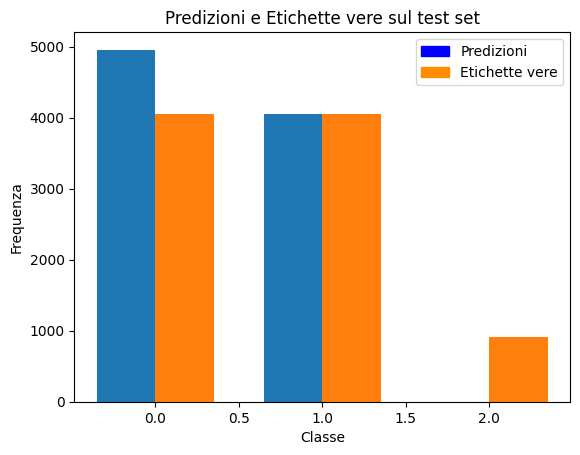

In [ ]:
# CREAZIONE INSOTGRAMMA DELLE PREDIZIONI
instogram_plot(test_labels, test_features, num_classesR)

1545/1545 [==============================] - 4s 2ms/step - loss: 0.7355 - categorical_accuracy: 0.6475
Test Loss: 0.7354826927185059
Test Accuracy: 0.647459864616394
1545/1545 [==============================] - 3s 2ms/step


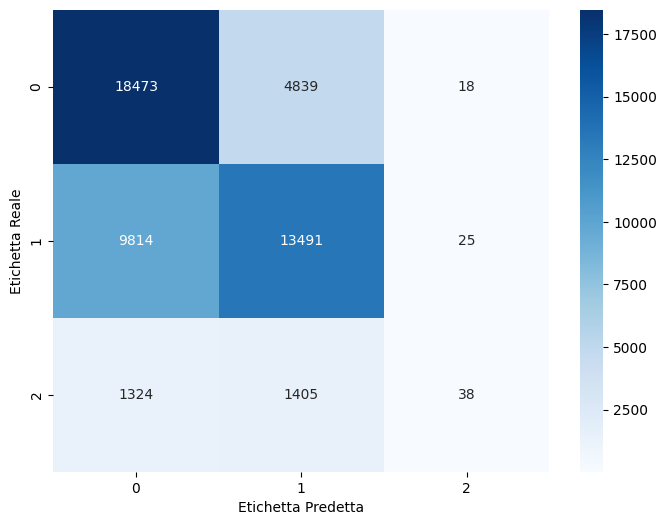

In [ ]:
flagModelC = 1

# CREAZIONE MATRICE DI CONFUSIONE
confusionMatrix(classifier_model, test_features, test_labels, flagModelC)

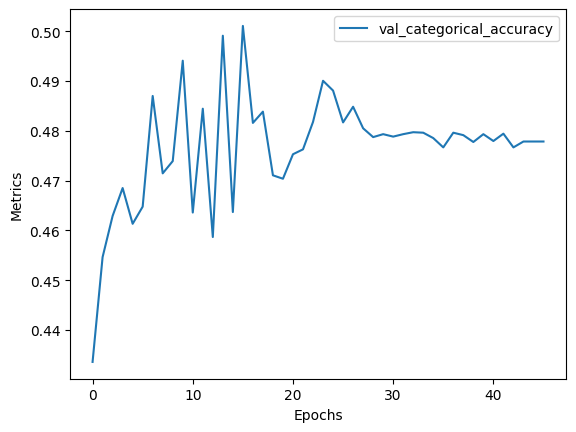

In [ ]:
# CREAZIONE INSOGRAMMA DELLA HISTORY
plot_history(history_classifier, ['val_categorical_accuracy'])

In [ ]:
# SALVATAGGIO DEI PESI SU DRIVE
weights_path = "/content/drive/MyDrive/ESM/KinDeNet/Weights/ClassifierWeights_lr" + str(learning_rate) + "_batch" + str(batch_size) + "_epochs" + str(num_epochs) + ".h5"
classifier_model.save_weights(weights_path)

# FUNZIONE DI PREDIZIONE SU IMMAGINI SOLITI IGNOTI

In [ ]:
def predict_similarity(image_1_path, image_2_path, siamese_model, classifier_model, input_dimension, input_channel):
  ''' 
      Predice la presenza o meno di parentela tra due immagini
        # PRECONDIZIONE: definizione dell'architettura del modello siamese di estrazione delle feature e numero di classi per le label
        # POSTCONDIZIONE: modello di classificatore
      ----------
      PARAMETRI:
        image_1_path: path della prima immagine
            str
        image_2_path: path della seconda immagine
            str
        siamese_model: modello siamese di rete per la feature extraction
            keras_vggface
        classifier_model: rete neurale fully-connected per la classificazione
            keras_model
        input_dimension: dimensione desiderata dell'immagine
            int
        input_channel: numero di canali dell'immagine
            int
      ----------
      RETURN:
        prediction: predizione sulla coppia di immagini
            np_array
  '''       

  # PREPARAZIONE DELLA PRIMA IMMAGINE
  image_1 = img_preprocessing(image_1_path, input_dimension)
  image_1 = image_1[:,:,:input_channel]                                         #leviamo il 4 canale
  image_1 = np.reshape(image_1, (-1, input_dimension, input_dimension, input_channel))

  # PREPARAZIONE DELLA SECONDA IMMAGINE
  image_2 = img_preprocessing(image_2_path, input_dimension)
  image_2 = image_2[:,:,:input_channel]                                         #leviamo il 4 canale
  image_2 = np.reshape(image_2, (-1, input_dimension, input_dimension, input_channel))
  
  # ESTRAZIONE DELLE FEATURES DALLA COPPIA DI IMMAGINI
  features_1 = siamese_model.predict([image_1, image_2])

  # PREDIZIONE DELLA CLASSE DALLE FEATURES
  prediction = classifier_model.predict(features_1)

  print(prediction)
  return prediction

In [ ]:
# UNZIP DELLA CARTELLA SOLITI_IGNOTI IN LOCALE
!unzip /content/drive/MyDrive/ESM/KinDeNet/Soliti_Ignoti.zip 

Archive:  /content/drive/MyDrive/ESM/KinDeNet/Soliti_Ignoti.zip
   creating: Soliti_Ignoti/Ignoti/
  inflating: Soliti_Ignoti/Ignoti/Ignoto_1.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_2.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_3.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_4.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_5.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_6.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_7.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_8.jpg  
  inflating: Soliti_Ignoti/indiziato.jpg  


In [ ]:
image_1_path = '/content/Soliti_Ignoti/indiziato.jpg'                           # Definiamo il percorso dell'immagine dell'indiziato

# PREDIZIONE PER OGNUNO DEGLI 8 IGNOTI
predictions = []                                                                # Lista vuota per contenere le predizioni
for elem in sorted(glob('/content/Soliti_Ignoti/Ignoti/*.jpg')):
  predictions.append(predict_similarity(image_1_path, elem, siamese_model, classifier_model, input_dimension, input_channels))

predictions = np.array(predictions)                                             # Trasformiamo la lista di predizioni in un array numpy
index = np.argmax(predictions)                                                  # Prendiamo l'indice della predizione più alta

# STAMPA DEL RISULTATO
print('Il parente misterioso è il numero ' + str(index+1))

# DEFINIZIONE RETE CLASSIFICATORE BINARIO [RETE FINE TUNING]

In [ ]:
def create_siamese_classifier_network(base_network, train_after_layer, input_dimension, input_channels, weights_path, filename):
  ''' 
      Crea un modello di rete siamese per l'estrazione di features e la classificazione
        # PRECONDIZIONE: definizione dell'architettura di rete e path dei pesi pre-addestrati valido
        # POSTCONDIZIONE: modello di rete per feature extraction e classificazione

      ----------
      PARAMETRI:
        base_network: modello base di rete
            keras_model
        train_after_layer: numero dell'ultimo livello da non trainare
            int
        input_dimension: dimensione di input dell'immagine
            int
        input_channels: numero di canali di input dell'immagine
            int
        weights_path: percorso dei pesi della rete pre-addestrata con triplet loss
            str
        filename: nome dei pesi specifici da prendere
            str

      ----------
      RETURN:
        Model
  ''' 
  base_network.load_weights(weights_path + filename)                            # Caricamento dei pesi sul base_network

  base_network = base_network.get_layer("vggface_resnet50")                     # Estrazione dei layer corrispondenti a ResNet50         

  for layer in base_network.layers[:train_after_layer]:                         # Congela tutti i pesi del modello base fino al layer indicato
      layer.trainable = False

  # DEFINIZIONE DEGLI INPUT
  input_1 = Input(shape = (input_dimension, input_dimension, input_channels))
  input_2 = Input(shape = (input_dimension, input_dimension, input_channels))
  
  # SELEZIONE DEI LAYER DI INTERESSE
  desired_layers = ["activation_9", "activation_21", "activation_39", "activation_48"]
  selected_features = []

  # ESTRAZIONE DELLE FEATURE DAI LAYER DI INTERESSE
  for layer_name in desired_layers:
    layer_output = base_network.get_layer(layer_name).output                    # Estrazione delle feature dallo strato corrente
    pooled_features = tf.keras.layers.GlobalAveragePooling2D()(layer_output)    # Averaging Pooling 1x1
    normalized_features = tf.keras.layers.BatchNormalization()(pooled_features) # Aggiunta di un layer di BatchNormalization
    selected_features.append(normalized_features)                               # Salvataggio delle feature estratte per lo strato corrente

  # CONCATENAZIONE DELLE FEATURES ESTRATTE
  concatenated = tf.keras.layers.Concatenate()(selected_features)               
  
  # CREAZIONE DI UN NUOVO MODELLO CON INPUT E FEATURE ESTRATTE
  new_model = Model(inputs = base_network.input, outputs = concatenated)          

  # APPLICAZIONE DELLE DUE IMMAGINI IN INGRESSO AL NUOVO MODELLO
  total_features_1 = new_model(input_1)
  total_features_2 = new_model(input_2)

  # CALCOLO DELLA DIFFERENZA IN VALORE ASSOLUTO TRA LE FEATURE DELLE DUE IMMAGINI (L1)
  diff_features = tf.math.abs(tf.subtract(total_features_1, total_features_2))

  # AGGIUNTA DI LIVELLI FULLY-CONNECTED
  fc_layer1 = Dense(512, activation='relu')(diff_features)
  fc_layer2 = Dense(128, activation='relu')(fc_layer1)
  output = Dense(1, activation='sigmoid')(fc_layer2)

  # CREAZIONE DEL MODELLO DI RETE SIAMESE CON INPUT LE DUE IMMAGINI E OUTPUT LA L1 DELLE FEATURES
  siamese_classifier_model = Model(inputs=[input_1,input_2], outputs=output)    

  # COMPILAZIONE DEL CLASSIFICATORE
  siamese_classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                            loss=keras.losses.binary_crossentropy,
                            metrics=['accuracy'])

  return siamese_classifier_model

In [ ]:
filename = "Weights_lr1e-05_batch150_epochs20_bestEpoch1.hdf5"                  # Nome dei pesi scelti
train_after_layer = 141                                                         # Numero dell'ultimo layer non trainabile

# DEFINIZIONE RETE PER FEATURE EXTRACTION E CLASSIFICAZIONE
siamese_classifier_model = create_siamese_classifier_network(siameseRES_model, train_after_layer, input_dimension, input_channels, ResWeights_path, filename)
siamese_classifier_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_5 (Functional)           (None, 3840)         23576512    ['input_9[0][0]',                
                                                                  'input_10[0][0]']         

# ESTRAZIONE DEI PATH E DELLE LABEL DAI CSV [RETE FINE TUNING]

In [ ]:
# SALVATAGGIO DEI CSV PER IMG1-IMG2-LABEL DEL TRAINING IN LOCALE
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training/img1.csv" "img1TR.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training/img2.csv" "img2TR.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Training/label.csv" "labelTR.csv"

# SALVATAGGIO DEI CSV PER IMG1-IMG2-LABEL DEL VALIDATION IN LOCALE
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation/img1.csv" "img1V.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation/img2.csv" "img2V.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Validation/label.csv" "labelV.csv"

# SALVATAGGIO DEI CSV PER IMG1-IMG2-LABEL DEL TEST IN LOCALE
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Test/img1.csv" "img1T.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Test/img2.csv" "img2T.csv"
!cp "/content/drive/MyDrive/ESM/KinDeNet/Dataset_Splitted/Test/label.csv" "labelT.csv"

In [ ]:
num_classes = 12

# APERTURA DEI CSV RELATIVI ALLE LABELS
train_labels = list_from_csv(local_labelTR_path)
val_labels = list_from_csv(local_labelV_path)
test_labels = list_from_csv(local_labelT_path)

# CREAZIONE DELL'ENCODER DI LABELS
label_encoder = LabelEncoder()   
all_labels = train_labels + val_labels + test_labels 
label_encoder.fit(all_labels)

# CODIDICA DELLE LABEL IN FORMATO NUMERICO DAL FORMATO STRINGA
train_encode_labels = label_encoder.transform(np.ravel(train_labels))       
val_encode_labels = label_encoder.transform(np.ravel(val_labels))
test_encode_labels = label_encoder.transform(np.ravel(test_labels))
# N.B. np.ravel() appiattisce la lista di liste di label

# CREAZIONE NOTAZIONE ONE-HOT
train_labels = to_categorical(train_encode_labels, num_classes) 
val_labels = to_categorical(val_encode_labels, num_classes)
test_labels = to_categorical(test_encode_labels, num_classes)

# SALVATAGGIO IN LOCALE DELLE LABELS
list_on_csv_wH('/content', train_labels.tolist(), 'labelTR')
list_on_csv_wH('/content', val_labels.tolist(), 'labelV')
list_on_csv_wH('/content', test_labels.tolist(), 'labelT')

# LIBERAZIONE MEMORIA RAM
del train_encode_labels, val_encode_labels, test_encode_labels
gc.collect()

# TRAINING E HISTORY CLASSIFICATORE BINARIO [RETE FINE TUNING]

In [ ]:
# APERTURA DEI CSV RELATIVI ALLE LABELS
train_labels = list_from_csv(local_labelTR_path)
val_labels = list_from_csv(local_labelV_path)
test_labels = list_from_csv(local_labelT_path)

In [ ]:
# INIZIALIZZAZIONE VARIABILI
epochs = 2                                                                      # Numero di epoche per il fit
batch_size = 200                                                                # Grandezza di ogni batch per il fit
total_coupletsTR = len(train_labels )                                           # Numero totale di coppie del training set (troppo elevato per le risorse a disposizione)
total_coupletsV = len(val_labels)                                               # Numero totale di coppie del validation set (troppo elevato per le risorse a disposizione)
total_coupletsT = len(test_labels)                                              # Numero totale di coppie del test set (troppo elevato per le risorse a disposizione)
reduced_coupletsTR = 100000                                                     # Numero di coppie di training considerate per il fit
reduced_coupletsV = 21429                                                       # Numero di coppie di validation considerate per il fit
reduced_coupletsT = 21429                                                       # Numero di coppie di test considerate per il predict
patience_LR = 1                                                                 # Valore di patience per la callback di riduzione del learning rate
patience_ES = 1                                                                 # Valore di patience per la callback di stop preoce dell'addestramento
saved_epoch = 0                                                                 # Variabile per il salvataggio del valore della best-epoch

# CREAZIONE GENERATORI DI TRAINING E VALIDATION
genT = preprocess_couplets_binary(local_img1TR_path, local_img2TR_path, local_labelTR_path, input_dimension, batch_size)    
genV = preprocess_couplets_binary(local_img1V_path, local_img2V_path, local_labelV_path, input_dimension, batch_size) 

# FUNZIONE PER IL SALVATAGGIO DEL NUMERO DELLA BEST EPOCH
def save_epoch_number(epoch, logs):                                             
    global saved_epoch
    saved_epoch = epoch + 1                                                     # N.B. Aggiungiamo 1 perchè le epoche partono da 1

# CALLBACK: Salva i pesi del modello durante l'addestramento
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(                    
    filepath = local_ResWeights_path,                                           # Percorso in locale del file in cui salvare i pesi
    filename = 'weights_{epoch:02d}.h5',                                        # Nome del file dove salvare i pesi        
    save_weights_only = True,                                                   # Salva solo i pesi anziché l'intero modello
    monitor = 'val_accuracy',                                                   # Metrica da monitorare per il salvataggio dei pesi migliori
    mode = 'max',                                                               # Indica che la metrica monitorata deve essere massimizzata
    save_best_only = True,                                                      # Salva solo i pesi corrispondenti al miglior valore della metrica monitorata
    save_freq = 'epoch',                                                        # Frequenza di salvataggio dei pesi
    callbacks = [save_epoch_number]                                             # Callback per il salvataggio dell'epoca migliore
)

# CALLBACK: Riduce il learning rate quando una particolare metrica smette di migliorare
reduce_lr = keras.callbacks.ReduceLROnPlateau(                                  
    monitor = 'val_accuracy',                                                   # Monitora la loss del validation set
    factor = 0.1,                                                               # Fattore di riduzione del learning rate (10%)
    patience = patience_LR,                                                     # Numero di epoche senza miglioramenti dopo il quale il learning rate viene ridotto
    verbose = 1,                                                                # Stampa un messaggio quando il learning rate viene ridotto
    mode = 'max',                                                               # Modalità di monitoraggio ('max' per massimizzare la loss)
    min_delta = 0.0001,                                                         # Soglia per considerare un miglioramento significativo
    min_lr = 1e-10                                                              # Learning rate minimo consentito
)

# CALLBACK: Se una particolare metrica smette di migliorare l'addestramento viene interrotto
early_stopping = keras.callbacks.EarlyStopping(                                 
    monitor = "val_accuracy",                                                   # Monitora la loss del validation set
    min_delta = 0,                                                              # Differenza minima ritenuta come miglioramento
    patience = patience_ES,                                                     # Numero di epoche consecutive senza miglioramento prima di interrompere l'addestramento
    verbose = 1,                                                                # Stampa un messaggio quando l'addestramento viene interrotto
    mode = "max",                                                               # Indica che la metrica monitorata deve essere massimizzata
    baseline = None,                                                            # Valore di riferimento per la metrica monitorata
    restore_best_weights = True,                                                # Ripristina i pesi del modello al miglior punto durante l'addestramento
    start_from_epoch = 0,                                                       # Indica da quale epoca iniziare il conteggio delle epoche senza miglioramento
)

# CALLBACK: Salvataggio delle metriche di training e validazione in formato csv
csv_logger = keras.callbacks.CSVLogger(local_CSVLogger_path)                   

# ADDESTRAMENTO DEL MODELLO SULLE COPPIE (IMAGE_1-IMAGE_2)
history = siamese_classifier_model.fit(
    genT,                                                                       # Generatore di training
    validation_data=genV,                                                       # Generatore di validazione
    epochs=epochs,                                                              # Numero di epoche di addestramento
    steps_per_epoch=reduced_coupletsTR//batch_size,                             # Numero di passi per epoca di addestramento
    validation_steps=reduced_coupletsV//batch_size,                             # Numero di passi per epoca di validazione
    verbose=True,                                                               # Messaggi di avviso sulle metriche
    callbacks=[model_checkpoint_callback, reduce_lr, early_stopping, csv_logger] # Callback da utilizzare durante l'addestramento
)

Epoch 1/2
500/500 [==============================] - 3405s 7s/step - loss: 0.6528 - accuracy: 0.6227 - val_loss: 0.5967 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 2/2
500/500 [==============================] - ETA: 0s - loss: 0.5817 - accuracy: 0.7002
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch: 1.
500/500 [==============================] - 3386s 7s/step - loss: 0.5817 - accuracy: 0.7002 - val_loss: 0.6259 - val_accuracy: 0.6837 - lr: 0.0010
Epoch 2: early stopping


In [ ]:
# SALVATAGGIO DEI PESI SUL DRIVE
weights_path = "/content/drive/MyDrive/ESM/KinDeNet/Weights/Weights_lr" + str(learning_rate) + "_batch" + str(batch_size) + "_epochs" + str(epochs) + "_bestEpoch" + str(saved_epoch) + ".h5"
siamese_classifier_model.save_weights(weights_path)

In [ ]:
# SALVATAGGIO DI BACKUP DEI PESI MIGLIORI CON MODEL-CHECKPOINT
!cp "/content/ResWeights.h5" "/content/drive/MyDrive/ESM/KinDeNet/Weights/ResWeights.h5"

In [ ]:
# SALVATAGGIO DEL MODELLO ADDESTRATO
siamese_classifier_model.save("/content/rete_completa_binaria.h5")

In [ ]:
# COPIA SUL DRIVE DEL MODELLO ADDESTRATO
!cp "/content/rete_completa_binaria.h5" "/content/drive/MyDrive/ESM/KinDeNet/Models"

In [ ]:
# CARICAMENTO DEL MODELLO ADDESTRATO
siamese_classifier_model = tf.keras.models.load_model("/content/rete_completa_binaria.h5")

In [ ]:
# STAMPA DELL'HISTORY DELLE METRICHE
plot_history(history, metrics=['accuracy', 'val_accuracy'])

In [ ]:
# ESTRAZIONE DELLE FEATURES E LABELS DI TEST MEDIANTE GENERATORE
genT = preprocess_couplets_binary(local_img1T_path, local_img2T_path, local_labelT_path, input_dimension, reduced_couplets_T)  
test_features, test_labels = next(genT)

In [ ]:
flagModelBC = 0

# CREAZIONE MATRICE DI CONFUSIONE PER IL TEST SET
confusionMatrix(siamese_classifier_model, test_features, test_labels, flagModelBC)

# DEFINIZIONE RETE CLASSIFICATORE GRADI DI PARENTELA [RETE FINE TUNING]

In [ ]:
def create_siamese_classifier_network_more_classes(base_network, train_after_layer, input_dimension, input_channels, num_classes, weights_path, filename):
  ''' 
      Crea un modello di rete siamese per l'estrazione di features e la classificazione
        # PRECONDIZIONE: definizione dell'architettura di rete e path dei pesi pre-addestrati valido
        # POSTCONDIZIONE: modello di rete per feature extraction e classificazione

      ----------
      PARAMETRI:
        base_network: modello base di rete
            keras_model
        train_after_layer: numero dell'ultimo livello da non trainare
            int
        input_dimension: dimensione di input dell'immagine
            int
        input_channels: numero di canali di input dell'immagine
            int
        num_classes: numero di classi da classificare
            int
        weights_path: percorso dei pesi della rete pre-addestrata con triplet loss
            str
        filename: nome dei pesi specifici da prendere
            str

      ----------
      RETURN:
        Model
  ''' 
  base_network.load_weights(weights_path + filename)                            # Caricamento dei pesi sul base_network

  base_network = base_network.get_layer("vggface_resnet50")                     # Estrazione dei layer corrispondenti a ResNet50         

  for layer in base_network.layers[:train_after_layer]:                         # Congela tutti i pesi del modello base fino al layer indicato
      layer.trainable = False

  # DEFINIZIONE DEGLI INPUT
  input_1 = Input(shape = (input_dimension, input_dimension, input_channels))
  input_2 = Input(shape = (input_dimension, input_dimension, input_channels))
  
  # SELEZIONE DEI LAYER DI INTERESSE
  desired_layers = ["activation_9", "activation_21", "activation_39", "activation_48"]
  selected_features = []

  # ESTRAZIONE DELLE FEATURE DAI LAYER DI INTERESSE
  for layer_name in desired_layers:
    layer_output = base_network.get_layer(layer_name).output                    # Estrazione delle feature dallo strato corrente
    pooled_features = tf.keras.layers.GlobalAveragePooling2D()(layer_output)    # Averaging Pooling 1x1
    normalized_features = tf.keras.layers.BatchNormalization()(pooled_features) # Aggiunta di un layer di BatchNormalization
    selected_features.append(normalized_features)                               # Salvataggio delle feature estratte per lo strato corrente

  # CONCATENAZIONE DELLE FEATURES ESTRATTE
  concatenated = tf.keras.layers.Concatenate()(selected_features)               

  # CREAZIONE DI UN NUOVO MODELLO CON INPUT E FEATURE ESTRATTE
  new_model = Model(inputs = base_network.input, outputs = concatenated)          

  # APPLICAZIONE DELLE DUE IMMAGINI IN INGRESSO AL NUOVO MODELLO
  total_features_1 = new_model(input_1)
  total_features_2 = new_model(input_2)

  # CALCOLO DELLA DIFFERENZA IN VALORE ASSOLUTO TRA LE FEATURE DELLE DUE IMMAGINI (L1)
  diff_features = tf.math.abs(tf.subtract(total_features_1, total_features_2))

  # AGGIUNTA DI LIVELLI FULLY-CONNECTED
  fc_layer1 = Dense(2048, activation='relu')(diff_features)
  fc_layer2 = Dense(512, activation='relu')(fc_layer1)
  fc_layer3 = Dense(128, activation='relu')(fc_layer2)
  output = Dense(num_classes, activation='softmax')(fc_layer3)

  # CREAZIONE DEL MODELLO DI RETE 
  siamese_model = Model(inputs=[input_1,input_2], outputs=output)    

  # DEFINIZIONE METRICHE DI ACCURACY
  accuracy = tf.keras.metrics.CategoricalAccuracy(name = "accuracy")
  top_2_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(name = "top_2_accuracy", k=2)

  # COMPILAZIONE DEL CLASSIFICATORE
  siamese_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=[accuracy, top_2_accuracy])

  return siamese_model

In [ ]:
filename = "Weights_lr1e-05_batch150_epochs20_bestEpoch1.hdf5"                  # Nome dei pesi scelti
num_classes = 3                                                                 # Numero di classi da classificare
train_after_layer = 30                                                          # Numero dell'ultimo livello non trainabile

# DEFINIZIONE RETE SIAMESE PER FEATURE EXTRACTION
siamese_classifier_model = create_siamese_classifier_network_more_classes(siameseRES_model, train_after_layer, input_dimension, input_channels, num_classes, ResWeights_path, filename)
siamese_classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 3840)         23576512    ['input_5[0][0]',                
                                                                  'input_6[0][0]']          

# TRAINING E HISTORY CLASSIFICATORE GRADI DI PARENTELA [RETE FINE TUNING]

In [ ]:
# APERTURA DEI CSV RELATIVI ALLE LABELS
train_labels = list_from_csv(local_labelTR_path)
val_labels = list_from_csv(local_labelV_path)
test_labels = list_from_csv(local_labelT_path)

In [ ]:
# INIZIALIZZAZIONE VARIABILI
epochs = 3                                                                      # Numero di epoche per il fit
batch_size = 200                                                                # Grandezza di ogni batch per il fit
total_coupletsTR = len(train_labels)                                            # Numero totale di triple del training set (troppo elevato per le risorse a disposizione)
total_coupletsV = len(val_labels)                                               # Numero totale di triple del validation set (troppo elevato per le risorse a disposizione)
reduced_coupletsTR = 100000                                                     # Numero di triple di training considerate per il fit
reduced_coupletsV = 21429                                                       # Numero di triple di validation considerare per il fit
patience_LR = 3                                                                 # Valore di patience per la callback di riduzione del learning rate
patience_ES = 7                                                                 # Valore di patience per la callback di stop preoce dell'addestramento
saved_epoch = 0                                                                 # Variabile per il salvataggio del valore della best-epoch
filename = "Weights_lr1e-05_batch150_epochs20_bestEpoch1.hdf5"                  # Nome dei pesi scelti
num_classes = 3                                                                 # Numero di classi del classificatore

# CREAZIONE GENERATORI DI TRAINING E VALIDATION
genT = preprocess_couplets_3class(local_img1TR_path, local_img2TR_path, local_labelTR_path, input_dimension, batch_size)    
genV = preprocess_couplets_3class(local_img1V_path, local_img2V_path, local_labelV_path, input_dimension, batch_size) 

# FUNZIONE PER IL SALVATAGGIO DEL NUMERO DELLA BEST EPOCH
def save_epoch_number(epoch, logs):                                             
    global saved_epoch
    saved_epoch = epoch + 1                                                     # N.B. Aggiungiamo 1 perchè le epoche partono da 1

# CALLBACK: Salva i pesi del modello durante l'addestramento
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(                    
    filepath = local_ResWeights_path,                                           # Percorso in locale del file in cui salvare i pesi
    filename = 'weights_{epoch:02d}.h5',                                        # Nome del file dove salvare i pesi        
    save_weights_only = True,                                                   # Salva solo i pesi anziché l'intero modello
    monitor = 'val_accuracy',                                                       # Metrica da monitorare per il salvataggio dei pesi migliori
    mode = 'max',                                                               # Indica che la metrica monitorata deve essere minimizzata
    save_best_only = True,                                                      # Salva solo i pesi corrispondenti al miglior valore della metrica monitorata
    save_freq = 'epoch',                                                        # Frequenza di salvataggio dei pesi
    callbacks = [save_epoch_number]                                             # Callback per il salvataggio dell'epoca migliore
)

# CALLBACK: Riduce il learning rate quando una particolare metrica smette di migliorare
reduce_lr = keras.callbacks.ReduceLROnPlateau(                                  
    monitor = 'val_accuracy',                                                       # Monitora la loss del validation set
    factor = 0.1,                                                               # Fattore di riduzione del learning rate (10%)
    patience = patience_LR,                                                     # Numero di epoche senza miglioramenti dopo il quale il learning rate viene ridotto
    verbose = 1,                                                                # Stampa un messaggio quando il learning rate viene ridotto
    mode = 'max',                                                               # Modalità di monitoraggio ('min' per minimizzare la loss)
    min_delta = 0.0001,                                                         # Soglia per considerare un miglioramento significativo
    min_lr = 1e-10                                                               # Learning rate minimo consentito
)

# CALLBACK: Se una particolare metrica smette di migliorare l'addestramento viene interrotto
early_stopping = keras.callbacks.EarlyStopping(                                 
    monitor = "val_accuracy",                                                   # Monitora la loss del validation set
    min_delta = 0,                                                              # Differenza minima ritenuta come miglioramento
    patience = patience_ES,                                                     # Numero di epoche consecutive senza miglioramento prima di interrompere l'addestramento
    verbose = 1,                                                                # Stampa un messaggio quando l'addestramento viene interrotto
    mode = "max",                                                               # Indica che la metrica monitorata deve essere minimizzata
    baseline = None,                                                            # Valore di riferimento per la metrica monitorata
    restore_best_weights = True,                                                # Ripristina i pesi del modello al miglior punto durante l'addestramento
    start_from_epoch = 0,                                                       # Indica da quale epoca iniziare il conteggio delle epoche senza miglioramento
)

# CALLBACK: Salvataggio delle metriche di training e validazione in formato csv
csv_logger = keras.callbacks.CSVLogger(local_CSVLogger_path)             

# DEFINIZIONE RETE SIAMESE PER FEATURE EXTRACTION
siamese_classifier_model = create_siamese_classifier_network(siameseRES_model, input_dimension, input_channels, num_classes, ResWeights_path, filename)
siamese_classifier_model.summary()

# ADDESTRAMENTO DEL MODELLO SULLE TRIPLE (ANCHOR-POSITIVE-NEGATIVE)
history = siamese_classifier_model.fit(
    genT,                                                                        # Generatore di training
    validation_data=genV,                                                        # Generatore di validazione
    epochs=epochs,                                                               # Numero di epoche di addestramento
    steps_per_epoch=reduced_coupletsTR//batch_size,                              # Numero di passi per epoca di addestramento
    validation_steps=reduced_coupletsV//batch_size,                              # Numero di passi per epoca di validazione
    verbose=True,                                                                # Messaggi di avviso sulle metriche
    callbacks=[model_checkpoint_callback, reduce_lr, early_stopping, csv_logger] # Callback da utilizzare durante l'addestramento
)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_3 (Functional)           (None, 3840)         23576512    ['input_7[0][0]',                
                                                                  'input_8[0][0]']          

In [ ]:
# SALVATAGGIO DEL MODELLO ADDESTRATO
siamese_classifier_model.save("/content/rete_completa_3_classi.h5")

In [ ]:
# COPIA SUL DRIVE DEL MODELLO ADDESTRATO
!cp "/content/rete_completa_3_classi.h5" "/content/drive/MyDrive/ESM/KinDeNet/Models"

In [ ]:
# CARICAMENTO DEL MODELLO ADDESTRATO
siamese_classifier_model = tf.keras.models.load_model("/content/drive/MyDrive/ESM/KinDeNet/Models/rete_completa_3_classi.h5")

In [ ]:
# SALVATAGGIO DEI PESI SUL DRIVE
weights_path = "/content/drive/MyDrive/ESM/KinDeNet/Weights/Weights_lr" + str(learning_rate) + "_batch" + str(batch_size) + "_epochs" + str(epochs) + "_bestEpoch" + str(saved_epoch) + ".h5"
siamese_classifier_model.save_weights(weights_path)

In [ ]:
# SALVATAGGIO DI BACKUP DEI PESI MIGLIORI CON MODEL-CHECKPOINT
!cp "/content/ResWeights.h5" "/content/drive/MyDrive/ESM/KinDeNet/Weights/ResWeights.h5"

In [ ]:
# ESTRAZIONE DELLE FEATURES E LABELS DI TEST MEDIANTE GENERATORE
genT = preprocess_couplets_3class(local_img1T_path, local_img2T_path, local_labelT_path, input_dimension, 21429)  
test_features, test_labels = next(genT)

In [ ]:
flagModelC = 1

# CREAZIONE MATRICE DI CONFUSIONE PER IL TEST SET
confusionMatrix(siamese_classifier_model, test_features, test_labels, flagModelC)

In [ ]:
# CREAZIONE INSOTGRAMMA DELLE PREDIZIONI
instogram_plot(test_labels, test_features, num_classes)

In [ ]:
# STAMPA DELL'HISTORY DELLE METRICHE
plot_history(history, metrics=['accuracy', 'val_accuracy'])

# FUNZIONE DI PREDIZIONE SU IMMAGINI SOLITI IGNOTI [RETE FINE TUNING]

In [ ]:
def predict_similarity_full(image_1_path, image_2_path, siamese_classifier_model, input_dimension, input_channel):
  ''' 
      Predice la presenza o meno di parentela tra due immagini
        # PRECONDIZIONE: definizione dell'architettura del modello siamese di estrazione delle feature e numero di classi per le label
        # POSTCONDIZIONE: modello di classificatore
      ----------
      PARAMETRI:
        image_1_path: path della prima immagine
            str
        image_2_path: path della seconda immagine
            str
        siamese_classifier_model: modello siamese di rete per la feature extraction e la classificazione
            keras_model
        input_dimension: dimensione desiderata dell'immagine
            int
        input_channel: numero di canali dell'immagine
            int
      ----------
      RETURN:
        prediction: predizione sulla coppia di immagini
            np_array
  '''       

  # PREPARAZIONE DELLA PRIMA IMMAGINE
  image_1 = img_preprocessing(image_1_path, input_dimension)
  image_1 = image_1[:,:,:input_channel]                                         #leviamo il 4 canale
  image_1 = np.reshape(image_1, (-1, input_dimension, input_dimension, input_channel))

  # PREPARAZIONE DELLA SECONDA IMMAGINE
  image_2 = img_preprocessing(image_2_path, input_dimension)
  image_2 = image_2[:,:,:input_channel]                                         #leviamo il 4 canale
  image_2 = np.reshape(image_2, (-1, input_dimension, input_dimension, input_channel))
  
  # PREDIZIONE DELLA CLASSE A PARTIRE DALLA COPPIA DI IMMAGINI
  prediction = siamese_classifier_model.predict([image_1, image_2])

  print(prediction)
  return prediction

In [ ]:
# UNZIP DELLA CARTELLA SOLITI_IGNOTI IN LOCALE
!unzip /content/drive/MyDrive/ESM/KinDeNet/Soliti_Ignoti.zip 

Archive:  /content/drive/MyDrive/ESM/KinDeNet/Soliti_Ignoti.zip
   creating: Soliti_Ignoti/Ignoti/
  inflating: Soliti_Ignoti/Ignoti/Ignoto_1.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_2.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_3.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_4.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_5.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_6.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_7.jpg  
  inflating: Soliti_Ignoti/Ignoti/Ignoto_8.jpg  
  inflating: Soliti_Ignoti/indiziato.jpg  


In [ ]:
image_1_path = '/content/Soliti_Ignoti/indiziato.jpg'                           # Definiamo il percorso dell'immagine dell'indiziato

# PREDIZIONE PER OGNUNO DEGLI 8 IGNOTI
predictions = []                                                                # Lista vuota per contenere le predizioni
for elem in sorted(glob('/content/Soliti_Ignoti/Ignoti/*.jpg')):
  predictions.append(predict_similarity_full(image_1_path, elem, siamese_model, classifier_model, input_dimension, input_channels))

predictions = np.array(predictions)                                             # Trasformiamo la lista di predizioni in un array numpy
index = np.argmax(predictions)                                                  # Prendiamo l'indice della predizione più alta

# STAMPA DEL RISULTATO
print('Il parente misterioso è il numero ' + str(index+1))